In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Dataset.csv')
df

,Age_Range,Gender,current_city,Current_EducationLevel,Employment_Status,Marital_Status,EatLess_OnWeightGain,EatLess_AtMealtime,RefuseFood_WeightConcern,Monitor_Food,...,Days_TriedLimitFoodToControlShapeOrWeight,Days_FastedToControlShapeOrWeight,Days_ExcludedFoodToControlShapeOrWeight,Days_FollowedRulesToControlShapeOrWeight,Days_FearLosingControlOverEating,Eat_SpecificFoodsHabitually,Location_TriggersHabitualEating,AutomaticEating_WhenExperiencingStrongEmotion,Realize_AfterEatingOutOfHabit,Perception_EatingDisorder
0,18-24,Male,Rajshahi,Bachelor's degree 3rd year,Student,In a relationship,Often,Never,Sometimes,Sometimes,...,13-27 days,Every day,1-12 days,Every day,1-12 days,Often,Often,Sometimes,Never,"Yes, I believe I do"
1,25-34,Female,Chattogram,Master's degree 2nd year,Self-employed,Married,Often,Often,Seldom,Often,...,1-12 days,13-27 days,13-27 days,No days,13-27 days,Often,Sometimes,Never,Never,"Yes, I believe I do"
2,18-24,Male,Khulna,Bachelor's degree 2nd year,Student,Single,Often,Never,Often,Seldom,...,Every day,1-12 days,1-12 days,13-27 days,1-12 days,Never,Sometimes,Never,Never,"Yes, I believe I do"
3,18-24,Female,Dhaka,Bachelor's degree 2nd year,Self-employed,Married,Often,Often,Never,Sometimes,...,Every day,1-12 days,Every day,1-12 days,1-12 days,Sometimes,Often,Often,Often,"Yes, I believe I do"
4,18-24,Male,Sylhet,Bachelor's degree 3rd year,Student,Single,Sometimes,Never,Seldom,Often,...,1-12 days,13-27 days,1-12 days,1-12 days,1-12 days,Often,Often,Seldom,Often,"Yes, I believe I do"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,18-24,Female,Rajshahi,Bachelor's degree 4th year,Employed full-time,In a relationship,Often,Seldom,Sometimes,Seldom,...,No days,No days,1-12 days,No days,1-12 days,Never,Never,Never,Never,"No, I don’t believe I do"
546,18-24,Male,Rangpur,Bachelor's degree 4th year,Employed full-time,Married,Never,Seldom,Sometimes,Sometimes,...,No days,No days,Every day,1-12 days,No days,Seldom,Sometimes,Sometimes,Often,"No, I don’t believe I do"
547,18-24,Male,Khulna,Bachelor's degree 4th year,Employed full-time,In a relationship,Often,Seldom,Often,Often,...,1-12 days,No days,No days,1-12 days,13-27 days,Seldom,Sometimes,Seldom,Often,"Yes, I believe I do"
548,18-24,Female,Dhaka,Bachelor's degree 2nd year,Employed full-time,Single,Seldom,Seldom,Never,Seldom,...,Every day,13-27 days,No days,13-27 days,No days,Sometimes,Never,Often,Sometimes,"Yes, I believe I do"


In [38]:
# Check dataset basic information
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nTarget variable unique values: {df['Perception_EatingDisorder'].unique()}")
print(f"\nTarget variable counts: {df['Perception_EatingDisorder'].value_counts()}")
df.info()

Dataset shape: (550, 57)

Column names: ['Age_Range', 'Gender', 'current_city', 'Current_EducationLevel', 'Employment_Status', 'Marital_Status', 'EatLess_OnWeightGain', 'EatLess_AtMealtime', 'RefuseFood_WeightConcern', 'Monitor_Food', 'Eat_SlimmingFoods', 'EatLess_AfterOvereating', 'EatLess_ToPreventWeightGain', 'AvoidSnacks_BetweenMealsForWeightConcern', 'AvoidEveningEating_ForWeightConcern', 'ConsiderWeight_WhenEating', 'Eat_WhenIrritated', 'Eat_WhenUnoccupied', 'Eat_WhenDepressedOrDiscouraged', 'Eat_WhenLonely', 'Eat_WhenSomeoneLetYouDown', 'Eat_WhenAngry', 'Eat_WhenExpectingBad', 'Eat_WhenAnxious', 'Eat_WhenThingsGoWrong', 'Eat_WhenFrightened', 'Eat_WhenDisappointed', 'Eat_WhenEmotionallyUpset', 'Eat_WhenBoredOrRestless', 'EatMore_IfFoodTasty', 'EatMore_IfFoodSmellsOrLooksGood', 'Eat_WhenSeeDeliciousFood', 'Eat_DeliciousFoodImmediately', 'DesireToBuy_FromBakery', 'DesireToBuy _FromSnackBarOrCafe', 'DesireToEat_WhenSeeOthersEating', 'Resist_DeliciousFood', 'EatMore_WhenSeeOthersEati

# Step 1: Data Preprocessing - OneHot Encoding for ALL Features

In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

# Create a copy of the dataset for processing
df_processed = df.copy()

# Define ALL feature columns (excluding the target variable) - using OneHot for ALL
all_feature_columns = [col for col in df.columns if col != 'Perception_EatingDisorder']

print(f"Total features to be OneHot encoded: {len(all_feature_columns)}")
print("Features to be encoded:")
for i, col in enumerate(all_feature_columns[:10]):  # Show first 10
    print(f"  {i+1}. {col}: {df[col].nunique()} unique values")
if len(all_feature_columns) > 10:
    print(f"  ... and {len(all_feature_columns) - 10} more features")

# Check a few columns to see their values
print(f"\nSample values from first few columns:")
for col in all_feature_columns[:3]:
    print(f"{col}: {df[col].unique()}")

Total features to be OneHot encoded: 56
Features to be encoded:
  1. Age_Range: 2 unique values
  2. Gender: 2 unique values
  3. current_city: 8 unique values
  4. Current_EducationLevel: 6 unique values
  5. Employment_Status: 4 unique values
  6. Marital_Status: 3 unique values
  7. EatLess_OnWeightGain: 4 unique values
  8. EatLess_AtMealtime: 4 unique values
  9. RefuseFood_WeightConcern: 4 unique values
  10. Monitor_Food: 4 unique values
  ... and 46 more features

Sample values from first few columns:
Age_Range: ['18-24' '25-34']
Gender: ['Male' 'Female']
current_city: ['Rajshahi' 'Chattogram' 'Khulna' 'Dhaka' 'Sylhet' 'Barishal' 'Mymensingh'
 'Rangpur']


In [5]:
# Apply OneHot Encoding to ALL features
ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
features_encoded = ohe.fit_transform(df_processed[all_feature_columns])

# Get feature names for one-hot encoded columns
ohe_feature_names = ohe.get_feature_names_out(all_feature_columns)
features_df = pd.DataFrame(features_encoded, columns=ohe_feature_names)

print(f"OneHot encoded features shape: {features_df.shape}")
print(f"Original features: {len(all_feature_columns)}")
print(f"Encoded features: {len(ohe_feature_names)}")
print(f"Feature expansion ratio: {len(ohe_feature_names) / len(all_feature_columns):.2f}x")

# Show some feature names
print(f"\nFirst 10 encoded feature names:")
for i, name in enumerate(ohe_feature_names[:10]):
    print(f"  {i+1}. {name}")

# Label encode the target variable (Yes/No -> 1/0)
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(df_processed['Perception_EatingDisorder'])

print(f"\nTarget variable encoding:")
for i, class_label in enumerate(le_target.classes_):
    print(f"  {class_label} -> {i}")

print(f"\nTarget distribution:")
print(pd.Series(y_encoded).value_counts())

OneHot encoded features shape: (550, 169)
Original features: 56
Encoded features: 169
Feature expansion ratio: 3.02x

First 10 encoded feature names:
  1. Age_Range_25-34
  2. Gender_Male
  3. current_city_Chattogram
  4. current_city_Dhaka
  5. current_city_Khulna
  6. current_city_Mymensingh
  7. current_city_Rajshahi
  8. current_city_Rangpur
  9. current_city_Sylhet
  10. Current_EducationLevel_Bachelor's degree 2nd year

Target variable encoding:
  No, I don’t believe I do -> 0
  Yes, I believe I do -> 1

Target distribution:
1    296
0    254
Name: count, dtype: int64


In [6]:
# Create final processed dataframe
X_encoded = features_df.copy()
df_final = X_encoded.copy()
df_final['target'] = y_encoded

print(f"Final encoded dataset shape: {X_encoded.shape}")
print(f"Features: {X_encoded.shape[1]} features")
print(f"Samples: {X_encoded.shape[0]} samples")

# Display first few rows
print(f"\nFirst 5 rows of processed data:")
print(df_final.head())

Final encoded dataset shape: (550, 169)
Features: 169 features
Samples: 550 samples

First 5 rows of processed data:
   Age_Range_25-34  Gender_Male  current_city_Chattogram  current_city_Dhaka  \
0              0.0          1.0                      0.0                 0.0   
1              1.0          0.0                      1.0                 0.0   
2              0.0          1.0                      0.0                 0.0   
3              0.0          0.0                      0.0                 1.0   
4              0.0          1.0                      0.0                 0.0   

   current_city_Khulna  current_city_Mymensingh  current_city_Rajshahi  \
0                  0.0                      0.0                    1.0   
1                  0.0                      0.0                    0.0   
2                  1.0                      0.0                    0.0   
3                  0.0                      0.0                    0.0   
4                  0.0          

# Step 2: Correlation Matrix Analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix for all features
correlation_matrix = df_final.corr()

print(f"Correlation matrix shape: {correlation_matrix.shape}")

# Extract correlations with target variable
target_correlations = correlation_matrix['target'].drop('target')  # Remove self-correlation
target_correlations = target_correlations.sort_values(key=abs, ascending=False)

print(f"Top 10 features most correlated with target (by absolute value):")
print(target_correlations.head(10))

print(f"\nTop 10 features least correlated with target (by absolute value):")
print(target_correlations.tail(10))

Correlation matrix shape: (170, 170)
Top 10 features most correlated with target (by absolute value):
Days_WeightAffectedSelfJudgment_Every day   -0.202068
Eat_SpecificFoodsHabitually_Sometimes        0.188454
Days_DissatisfiedWithShape_Every day        -0.185940
EatLess_ToPreventWeightGain_Often            0.185156
Eat_WhenPreparingMeal_Often                  0.179758
ConsiderWeight_WhenEating_Often              0.173078
EatMore_IfFoodSmellsOrLooksGood_Sometimes    0.172146
EatLess_OnWeightGain_Often                   0.164144
Eat_WhenAnxious_Often                        0.164112
Eat_WhenAngry_Often                          0.162995
Name: target, dtype: float64

Top 10 features least correlated with target (by absolute value):
Days_FollowedRulesToControlShapeOrWeight_13-27 days   -0.010471
RefuseFood_WeightConcern_Seldom                       -0.010083
AvoidSnacks_BetweenMealsForWeightConcern_Sometimes    -0.007037
Employment_Status_Self-employed                       -0.004045
Monito

Target correlations saved to 'target_variable_correlations.csv'


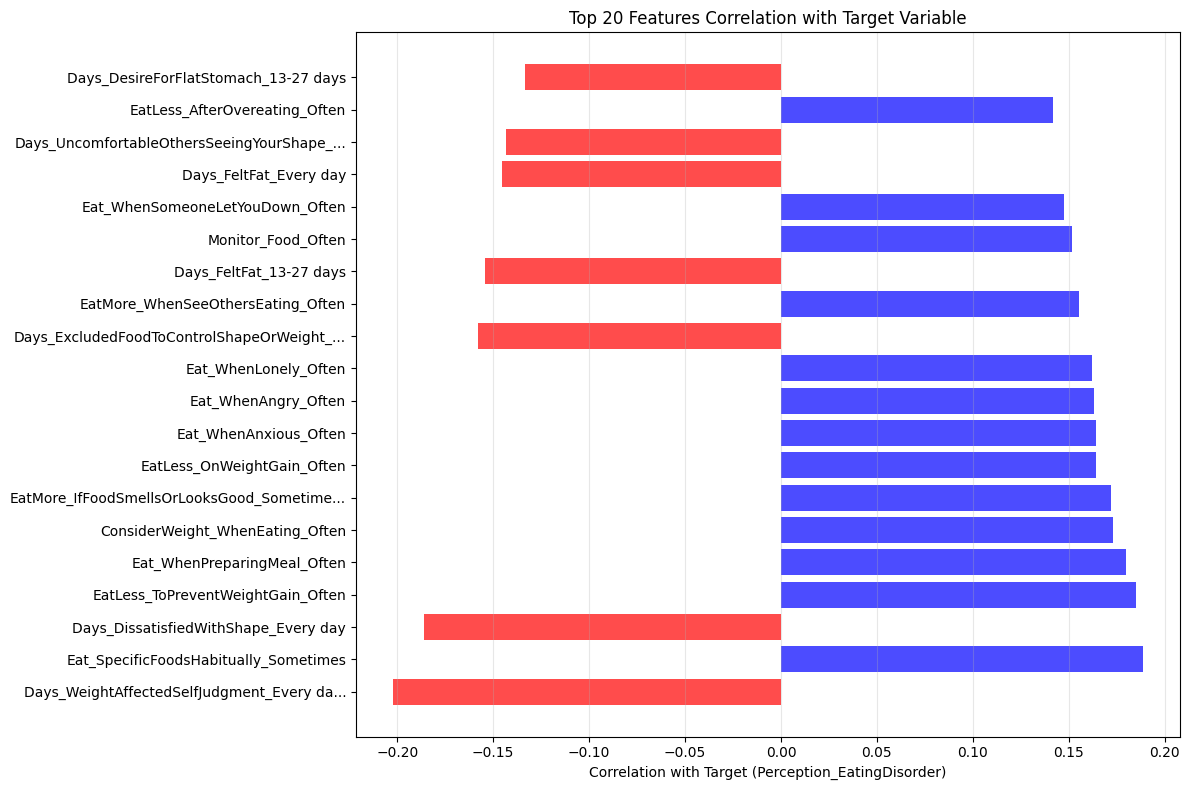


Summary statistics of target correlations:
Mean absolute correlation: 0.0721
Max correlation: 0.1885
Min correlation: -0.2021
Number of positive correlations: 62
Number of negative correlations: 107


In [13]:
# Save target correlations to CSV
target_corr_df = pd.DataFrame({
    'Feature': target_correlations.index,
    'Correlation_with_Target': target_correlations.values,
    'Abs_Correlation': abs(target_correlations.values)
}).sort_values('Abs_Correlation', ascending=False)

target_corr_df.to_csv('target_variable_correlations.csv', index=False)
print("Target correlations saved to 'target_variable_correlations.csv'")

# Visualize correlation with target
plt.figure(figsize=(12, 8))
top_20_corr = target_correlations.head(20)
colors = ['red' if x < 0 else 'blue' for x in top_20_corr.values]
bars = plt.barh(range(len(top_20_corr)), top_20_corr.values, color=colors, alpha=0.7)
plt.yticks(range(len(top_20_corr)), [name[:40] + '...' if len(name) > 40 else name for name in top_20_corr.index])
plt.xlabel('Correlation with Target (Perception_EatingDisorder)')
plt.title('Top 20 Features Correlation with Target Variable')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nSummary statistics of target correlations:")
print(f"Mean absolute correlation: {abs(target_correlations).mean():.4f}")
print(f"Max correlation: {target_correlations.max():.4f}")
print(f"Min correlation: {target_correlations.min():.4f}")
print(f"Number of positive correlations: {(target_correlations > 0).sum()}")
print(f"Number of negative correlations: {(target_correlations < 0).sum()}")

In [44]:
# Feature-to-feature correlation matrix (excluding target)
features_only = X_encoded  # Features without target
feature_correlation_matrix = features_only.corr()

# Find highly correlated feature pairs (excluding self-correlations)
def find_high_correlations(corr_matrix, threshold=0.7):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            correlation = corr_matrix.iloc[i, j]
            if abs(correlation) >= threshold:
                high_corr_pairs.append({
                    'Feature1': corr_matrix.columns[i],
                    'Feature2': corr_matrix.columns[j],
                    'Correlation': correlation
                })
    return pd.DataFrame(high_corr_pairs).sort_values('Correlation', key=abs, ascending=False)

high_corr_df = find_high_correlations(feature_correlation_matrix, threshold=0.7)
print(f"Found {len(high_corr_df)} feature pairs with correlation >= 0.7")

if len(high_corr_df) > 0:
    print("\nTop 10 highly correlated feature pairs:")
    print(high_corr_df.head(10))
else:
    print("\nNo feature pairs with correlation >= 0.7 found")
    # Try lower threshold
    high_corr_df = find_high_correlations(feature_correlation_matrix, threshold=0.5)
    print(f"\nFound {len(high_corr_df)} feature pairs with correlation >= 0.5")
    if len(high_corr_df) > 0:
        print("\nTop 10 moderately correlated feature pairs:")
        print(high_corr_df.head(10))

Found 44 feature pairs with correlation >= 0.7

Top 10 highly correlated feature pairs:
                                         Feature1  \
27               ConsiderWeight_WhenEating_Seldom   
12                       Eat_SlimmingFoods_Seldom   
28            ConsiderWeight_WhenEating_Sometimes   
13                    Eat_SlimmingFoods_Sometimes   
15                 EatLess_AfterOvereating_Seldom   
29           Days_DesireForFlatStomach_13-27 days   
26                ConsiderWeight_WhenEating_Often   
11                        Eat_SlimmingFoods_Often   
6                 RefuseFood_WeightConcern_Seldom   
25  AvoidEveningEating_ForWeightConcern_Sometimes   

                                             Feature2  Correlation  
27                       Eat_WhenPreparingMeal_Seldom     1.000000  
12                      DesireToBuy_FromBakery_Seldom     0.995163  
28                    Eat_WhenPreparingMeal_Sometimes     0.994732  
13                   DesireToBuy_FromBakery_Sometime

# Step 3: Clustering Analysis for Positive Cases

Now we'll perform clustering analysis on samples where the target variable is positive (Yes = 1)

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import numpy as np

# Filter positive cases (target = 1, which means "Yes")
positive_cases = df_final[df_final['target'] == 1].copy()
positive_features = positive_cases.drop('target', axis=1)

print(f"Total samples: {len(df_final)}")
print(f"Positive cases (Yes): {len(positive_cases)}")
print(f"Negative cases (No): {len(df_final) - len(positive_cases)}")
print(f"Positive cases percentage: {len(positive_cases)/len(df_final)*100:.2f}%")

# Scale the features for clustering
scaler = StandardScaler()
positive_features_scaled = scaler.fit_transform(positive_features)

print(f"\nFeatures shape for clustering: {positive_features_scaled.shape}")
print(f"Features for positive cases: {positive_features.shape[1]} features")

Total samples: 550
Positive cases (Yes): 296
Negative cases (No): 254
Positive cases percentage: 53.82%

Features shape for clustering: (296, 169)
Features for positive cases: 169 features


In [12]:
# Determine optimal number of clusters using Elbow method and Silhouette score
k_range = range(2, 11)
inertias = []
silhouette_scores = []
calinski_scores = []

print("Testing different numbers of clusters...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(positive_features_scaled)
    
    inertias.append(kmeans.inertia_)
    
    # Calculate silhouette score
    sil_score = silhouette_score(positive_features_scaled, cluster_labels)
    silhouette_scores.append(sil_score)
    
    # Calculate Calinski-Harabasz score
    cal_score = calinski_harabasz_score(positive_features_scaled, cluster_labels)
    calinski_scores.append(cal_score)
    
    print(f"K={k}: Silhouette={sil_score:.3f}, Calinski-Harabasz={cal_score:.1f}")

# Find best K based on silhouette score
best_k_silhouette = k_range[np.argmax(silhouette_scores)]
best_k_calinski = k_range[np.argmax(calinski_scores)]

print(f"\nBest K based on Silhouette score: {best_k_silhouette} (score: {max(silhouette_scores):.3f})")
print(f"Best K based on Calinski-Harabasz score: {best_k_calinski} (score: {max(calinski_scores):.1f})")

Testing different numbers of clusters...
K=2: Silhouette=0.024, Calinski-Harabasz=7.0
K=3: Silhouette=0.024, Calinski-Harabasz=6.8
K=2: Silhouette=0.024, Calinski-Harabasz=7.0
K=3: Silhouette=0.024, Calinski-Harabasz=6.8
K=4: Silhouette=0.020, Calinski-Harabasz=5.8
K=4: Silhouette=0.020, Calinski-Harabasz=5.8
K=5: Silhouette=0.019, Calinski-Harabasz=5.1
K=5: Silhouette=0.019, Calinski-Harabasz=5.1
K=6: Silhouette=0.019, Calinski-Harabasz=4.7
K=6: Silhouette=0.019, Calinski-Harabasz=4.7
K=7: Silhouette=0.015, Calinski-Harabasz=4.3
K=7: Silhouette=0.015, Calinski-Harabasz=4.3
K=8: Silhouette=0.016, Calinski-Harabasz=3.9
K=8: Silhouette=0.016, Calinski-Harabasz=3.9
K=9: Silhouette=0.015, Calinski-Harabasz=3.8
K=10: Silhouette=0.015, Calinski-Harabasz=3.6

Best K based on Silhouette score: 2 (score: 0.024)
Best K based on Calinski-Harabasz score: 2 (score: 7.0)
K=9: Silhouette=0.015, Calinski-Harabasz=3.8
K=10: Silhouette=0.015, Calinski-Harabasz=3.6

Best K based on Silhouette score: 2 (s

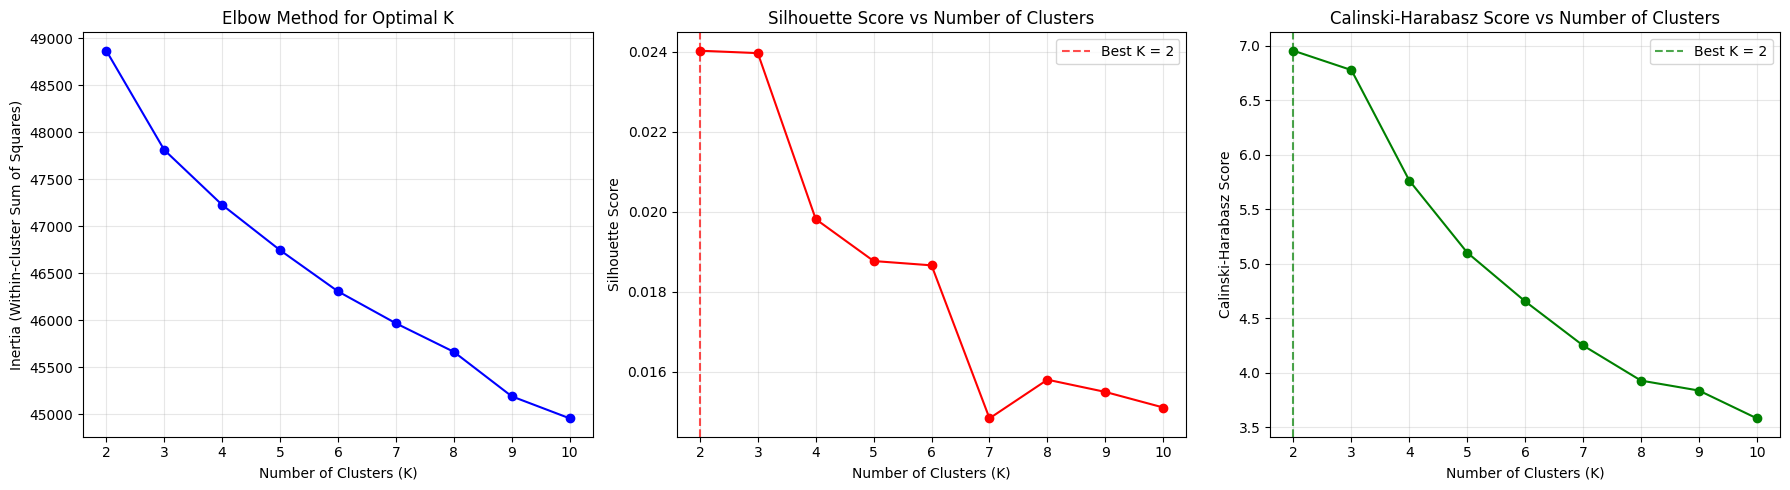


Selected optimal number of clusters: 2


In [13]:
# Visualize the cluster evaluation metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Elbow curve
axes[0].plot(k_range, inertias, 'bo-')
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia (Within-cluster Sum of Squares)')
axes[0].set_title('Elbow Method for Optimal K')
axes[0].grid(True, alpha=0.3)

# Silhouette scores
axes[1].plot(k_range, silhouette_scores, 'ro-')
axes[1].axvline(x=best_k_silhouette, color='red', linestyle='--', alpha=0.7, label=f'Best K = {best_k_silhouette}')
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score vs Number of Clusters')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Calinski-Harabasz scores
axes[2].plot(k_range, calinski_scores, 'go-')
axes[2].axvline(x=best_k_calinski, color='green', linestyle='--', alpha=0.7, label=f'Best K = {best_k_calinski}')
axes[2].set_xlabel('Number of Clusters (K)')
axes[2].set_ylabel('Calinski-Harabasz Score')
axes[2].set_title('Calinski-Harabasz Score vs Number of Clusters')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Choose the best K (using silhouette score as primary metric)
optimal_k = best_k_silhouette
print(f"\nSelected optimal number of clusters: {optimal_k}")

In [14]:
# Apply final clustering with optimal K
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(positive_features_scaled)

# Add cluster labels to the positive cases dataframe
positive_cases_clustered = positive_cases.copy()
positive_cases_clustered['cluster'] = cluster_labels

print(f"Clustering completed with {optimal_k} clusters")
print(f"\nCluster distribution:")
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    percentage = count / len(cluster_labels) * 100
    print(f"  Cluster {cluster_id}: {count} samples ({percentage:.1f}%)")

# Final silhouette score
final_silhouette = silhouette_score(positive_features_scaled, cluster_labels)
print(f"\nFinal silhouette score: {final_silhouette:.3f}")

Clustering completed with 2 clusters

Cluster distribution:
  Cluster 0: 231 samples (78.0%)
  Cluster 1: 65 samples (22.0%)

Final silhouette score: 0.024


In [17]:
# Analyze cluster characteristics - Top and Least features for each cluster
def analyze_cluster_features(cluster_data, feature_names, n_top=10):
    """Analyze top and least important features for each cluster"""
    
    cluster_analysis = {}
    overall_mean = cluster_data.drop(['cluster', 'target'], axis=1).mean()
    
    for cluster_id in sorted(cluster_data['cluster'].unique()):
        cluster_mask = cluster_data['cluster'] == cluster_id
        cluster_features = cluster_data[cluster_mask].drop(['cluster', 'target'], axis=1)
        cluster_mean = cluster_features.mean()
        
        # Calculate how much each feature deviates from overall mean
        deviations = cluster_mean - overall_mean
        
        # Top positive deviations (most above average)
        top_positive = deviations.nlargest(n_top)
        # Top negative deviations (most below average) 
        top_negative = deviations.nsmallest(n_top)
        
        cluster_analysis[cluster_id] = {
            'size': cluster_mask.sum(),
            'top_features': top_positive,
            'least_features': top_negative,
            'cluster_mean': cluster_mean
        }
    
    return cluster_analysis

# Perform cluster analysis
cluster_analysis = analyze_cluster_features(positive_cases_clustered, positive_features.columns)

print("="*80)
print("CLUSTER ANALYSIS RESULTS")
print("="*80)

for cluster_id, analysis in cluster_analysis.items():
    print(f"\n{'='*50}")
    print(f"CLUSTER {cluster_id} (n={analysis['size']} samples)")
    print(f"{'='*50}")
    
    print(f"\nTOP 10 FEATURES (Most Above Average):")
    for i, (feature, value) in enumerate(analysis['top_features'].items(), 1):
        print(f"  {i:2d}. {feature:<50} (+{value:+.4f})")
    
    print(f"\nTOP 10 LEAST FEATURES (Most Below Average):")
    for i, (feature, value) in enumerate(analysis['least_features'].items(), 1):
        print(f"  {i:2d}. {feature:<50} ({value:+.4f})")

CLUSTER ANALYSIS RESULTS

CLUSTER 0 (n=231 samples)

TOP 10 FEATURES (Most Above Average):
   1. RefuseFood_WeightConcern_Often                     (++0.0879)
   2. Eat_WhenSeeDeliciousFood_Often                     (++0.0874)
   3. RefuseFood_WeightConcern_Seldom                    (++0.0641)
   4. Eat_WhenSeeDeliciousFood_Seldom                    (++0.0622)
   5. EatLess_AfterOvereating_Often                      (++0.0485)
   6. DesireToBuy _FromSnackBarOrCafe_Often              (++0.0438)
   7. current_city_Sylhet                                (++0.0409)
   8. Days_DissatisfiedWithShape_13-27 days              (++0.0393)
   9. EatMore_IfFoodSmellsOrLooksGood_Seldom             (++0.0339)
  10. current_city_Chattogram                            (++0.0333)

TOP 10 LEAST FEATURES (Most Below Average):
   1. RefuseFood_WeightConcern_Sometimes                 (-0.1950)
   2. Eat_WhenSeeDeliciousFood_Sometimes                 (-0.1926)
   3. current_city_Rajshahi                       

In [50]:
# Save cluster analysis results to CSV
cluster_results_list = []

for cluster_id, analysis in cluster_analysis.items():
    # Top features
    for rank, (feature, deviation) in enumerate(analysis['top_features'].items(), 1):
        cluster_results_list.append({
            'Cluster_ID': cluster_id,
            'Cluster_Size': analysis['size'],
            'Feature_Type': 'Top',
            'Rank': rank,
            'Feature_Name': feature,
            'Deviation_from_Average': deviation,
            'Cluster_Mean_Value': analysis['cluster_mean'][feature]
        })
    
    # Least features
    for rank, (feature, deviation) in enumerate(analysis['least_features'].items(), 1):
        cluster_results_list.append({
            'Cluster_ID': cluster_id,
            'Cluster_Size': analysis['size'],
            'Feature_Type': 'Least', 
            'Rank': rank,
            'Feature_Name': feature,
            'Deviation_from_Average': deviation,
            'Cluster_Mean_Value': analysis['cluster_mean'][feature]
        })

cluster_results_df = pd.DataFrame(cluster_results_list)
cluster_results_df.to_csv('cluster_analysis_results.csv', index=False)

print(f"\nCluster analysis results saved to 'cluster_analysis_results.csv'")
print(f"Total records in analysis: {len(cluster_results_df)}")

# Summary statistics
print(f"\nSUMMARY:")
print(f"- Total positive cases analyzed: {len(positive_cases_clustered)}")
print(f"- Number of clusters found: {optimal_k}")
print(f"- Total features analyzed: {len(positive_features.columns)}")
print(f"- Silhouette score: {final_silhouette:.3f}")

print("\nCluster sizes:")
for cluster_id, analysis in cluster_analysis.items():
    percentage = (analysis['size'] / len(positive_cases_clustered)) * 100
    print(f"  Cluster {cluster_id}: {analysis['size']} samples ({percentage:.1f}%)")


Cluster analysis results saved to 'cluster_analysis_results.csv'
Total records in analysis: 40

SUMMARY:
- Total positive cases analyzed: 296
- Number of clusters found: 2
- Total features analyzed: 169
- Silhouette score: 0.024

Cluster sizes:
  Cluster 0: 231 samples (78.0%)
  Cluster 1: 65 samples (22.0%)


## PCA Visualization of Clusters

Let's visualize the clusters in 2D using Principal Component Analysis (PCA)

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA to reduce dimensionality to 2D for visualization
pca = PCA(n_components=2, random_state=42)
positive_features_pca = pca.fit_transform(positive_features_scaled)

print(f"PCA Explained Variance Ratio:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.4f} ({pca.explained_variance_ratio_[0]*100:.2f}%)")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.4f} ({pca.explained_variance_ratio_[1]*100:.2f}%)")
print(f"  Total explained variance: {sum(pca.explained_variance_ratio_):.4f} ({sum(pca.explained_variance_ratio_)*100:.2f}%)")

# Create DataFrame for visualization
pca_df = pd.DataFrame({
    'PC1': positive_features_pca[:, 0],
    'PC2': positive_features_pca[:, 1],
    'Cluster': cluster_labels
})

print(f"\nPCA components shape: {positive_features_pca.shape}")
print(f"PCA DataFrame shape: {pca_df.shape}")

PCA Explained Variance Ratio:
  PC1: 0.0299 (2.99%)
  PC2: 0.0294 (2.94%)
  Total explained variance: 0.0592 (5.92%)

PCA components shape: (296, 2)
PCA DataFrame shape: (296, 3)


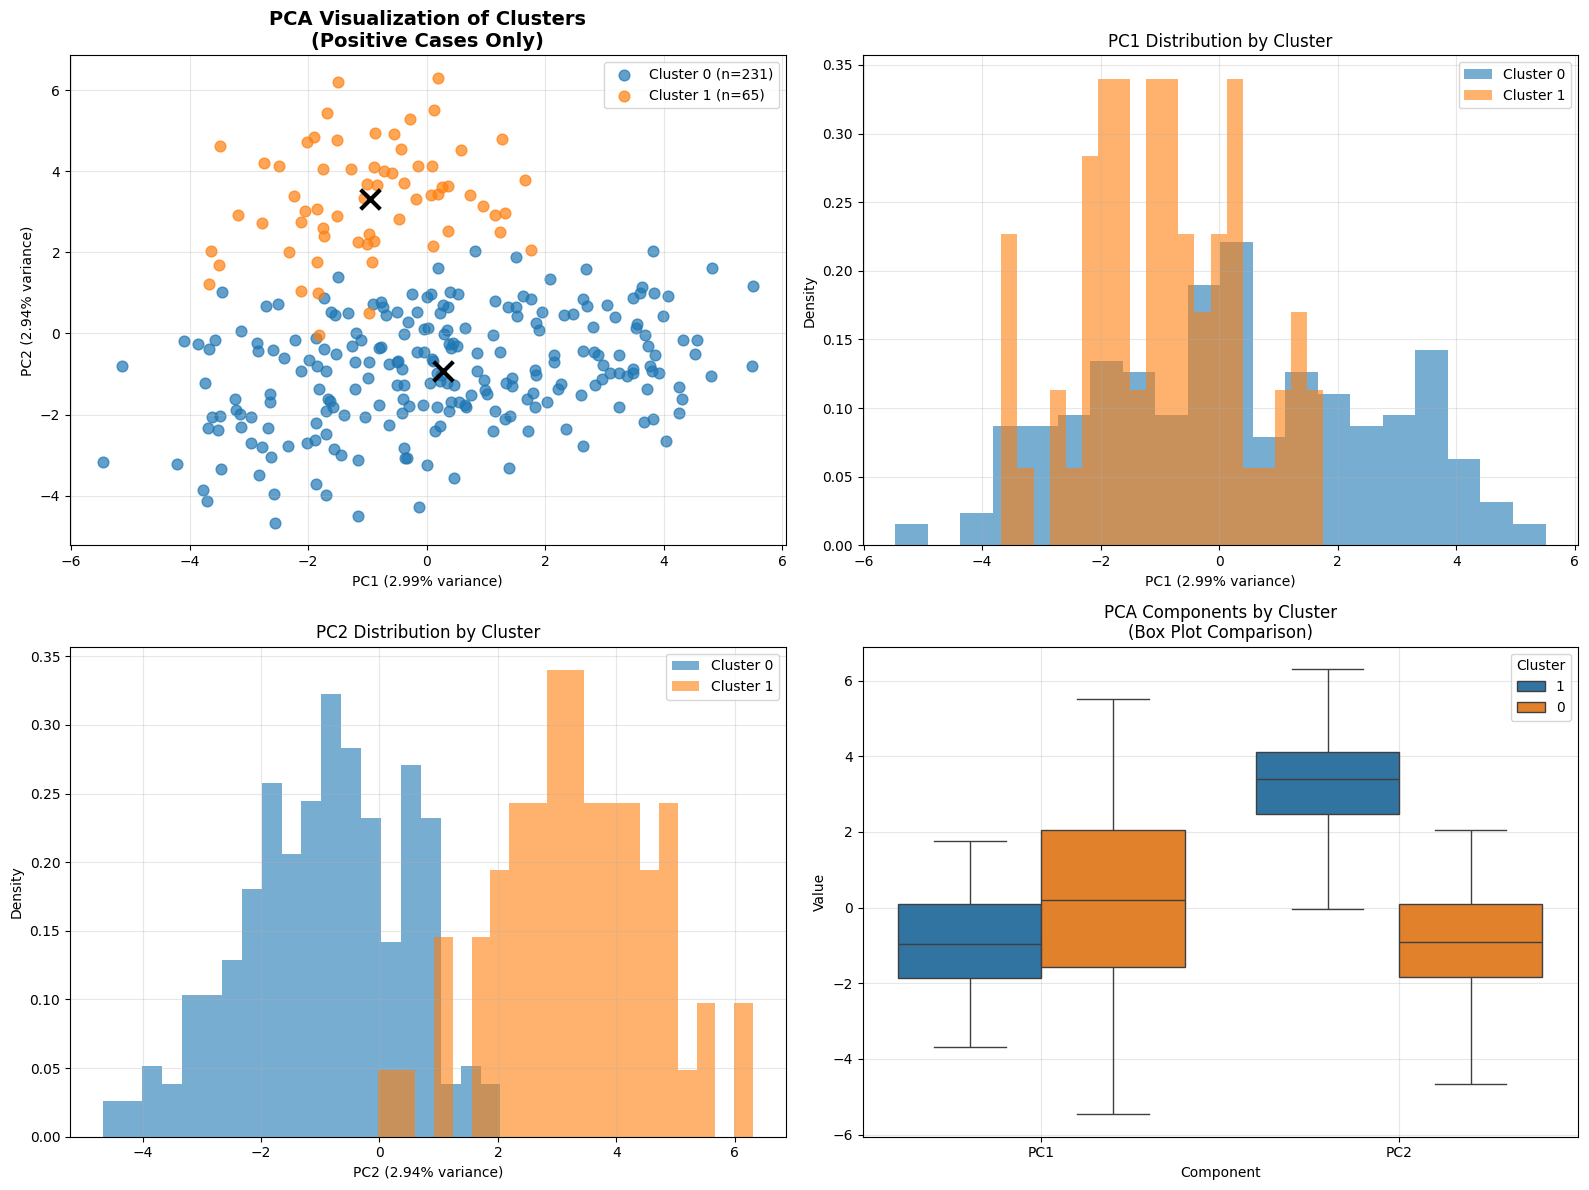

In [22]:
# Create comprehensive PCA visualization
plt.figure(figsize=(16, 12))

# Define colors for clusters
cluster_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
cluster_names = [f'Cluster {i}' for i in range(optimal_k)]

# Main PCA scatter plot
plt.subplot(2, 2, 1)
for i in range(optimal_k):
    cluster_mask = pca_df['Cluster'] == i
    cluster_size = cluster_mask.sum()
    plt.scatter(pca_df.loc[cluster_mask, 'PC1'], 
               pca_df.loc[cluster_mask, 'PC2'],
               c=cluster_colors[i], 
               label=f'{cluster_names[i]} (n={cluster_size})',
               alpha=0.7, 
               s=60)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.title('PCA Visualization of Clusters\n(Positive Cases Only)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Add cluster centers
cluster_centers_pca = pca.transform(final_kmeans.cluster_centers_)
for i, center in enumerate(cluster_centers_pca):
    plt.scatter(center[0], center[1], 
               c='black', marker='x', s=200, linewidth=3,
               label='Centroids' if i == 0 else "")

# Density plot for PC1
plt.subplot(2, 2, 2)
for i in range(optimal_k):
    cluster_mask = pca_df['Cluster'] == i
    plt.hist(pca_df.loc[cluster_mask, 'PC1'], 
             bins=20, alpha=0.6, 
             color=cluster_colors[i], 
             label=cluster_names[i],
             density=True)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel('Density')
plt.title('PC1 Distribution by Cluster')
plt.legend()
plt.grid(True, alpha=0.3)

# Density plot for PC2
plt.subplot(2, 2, 3)
for i in range(optimal_k):
    cluster_mask = pca_df['Cluster'] == i
    plt.hist(pca_df.loc[cluster_mask, 'PC2'], 
             bins=20, alpha=0.6, 
             color=cluster_colors[i], 
             label=cluster_names[i],
             density=True)
plt.xlabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.ylabel('Density')
plt.title('PC2 Distribution by Cluster')
plt.legend()
plt.grid(True, alpha=0.3)

# Box plot comparison
plt.subplot(2, 2, 4)
pca_melted = pca_df.melt(id_vars=['Cluster'], value_vars=['PC1', 'PC2'], 
                        var_name='Component', value_name='Value')
pca_melted['Cluster'] = pca_melted['Cluster'].astype(str)
sns.boxplot(data=pca_melted, x='Component', y='Value', hue='Cluster', palette=cluster_colors[:optimal_k])
plt.title('PCA Components by Cluster\n(Box Plot Comparison)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

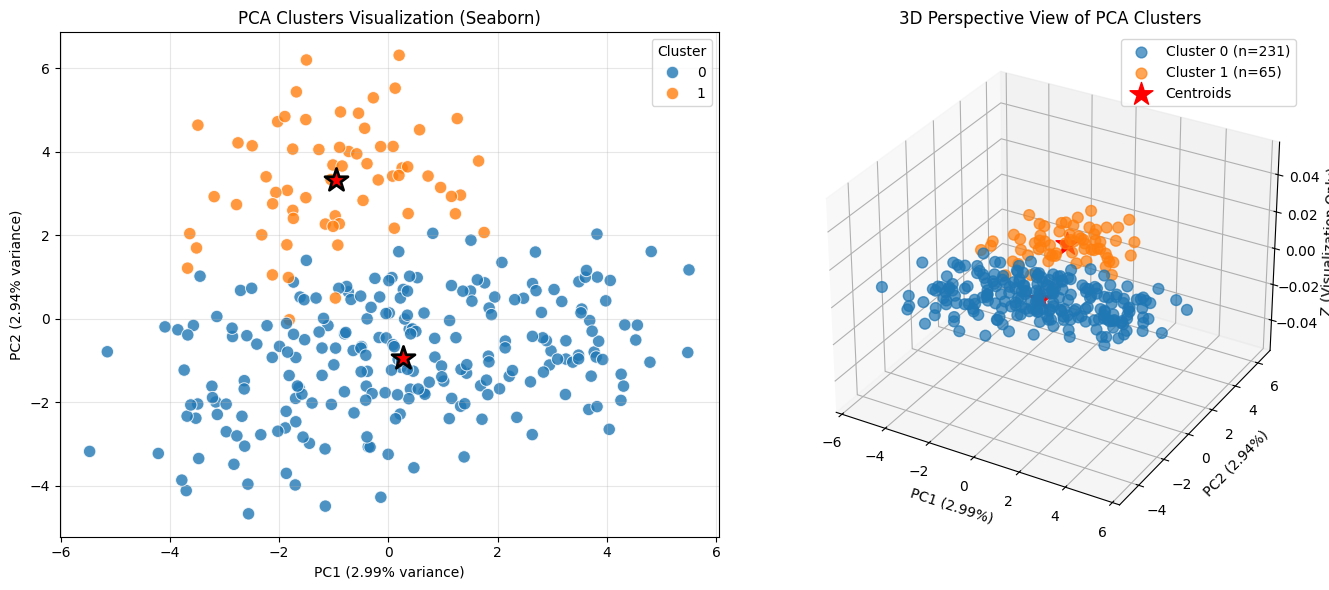

In [53]:
# Alternative PCA visualization with Seaborn
plt.figure(figsize=(14, 6))

# Seaborn scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', 
               palette=cluster_colors[:optimal_k], s=80, alpha=0.8)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.title('PCA Clusters Visualization (Seaborn)')
plt.grid(True, alpha=0.3)

# Add cluster centers
for i, center in enumerate(cluster_centers_pca):
    plt.scatter(center[0], center[1], 
               c='red', marker='*', s=300, 
               edgecolors='black', linewidth=2,
               label='Centroids' if i == 0 else "")

# 3D PCA visualization (even though we only have 2 components, we can show it in 3D perspective)
from mpl_toolkits.mplot3d import Axes3D
ax = plt.subplot(1, 2, 2, projection='3d')

for i in range(optimal_k):
    cluster_mask = pca_df['Cluster'] == i
    cluster_size = cluster_mask.sum()
    ax.scatter(pca_df.loc[cluster_mask, 'PC1'], 
              pca_df.loc[cluster_mask, 'PC2'],
              np.zeros(cluster_size),  # Z-axis as 0 since we only have 2 components
              c=cluster_colors[i], 
              label=f'Cluster {i} (n={cluster_size})',
              alpha=0.7, s=60)

# Add cluster centers in 3D
for i, center in enumerate(cluster_centers_pca):
    ax.scatter(center[0], center[1], 0, 
              c='red', marker='*', s=300,
              label='Centroids' if i == 0 else "")

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
ax.set_zlabel('Z (Visualization Only)')
ax.set_title('3D Perspective View of PCA Clusters')
ax.legend()

plt.tight_layout()
plt.show()

In [54]:
# Statistical analysis of PCA results
print("="*70)
print("PCA CLUSTER ANALYSIS SUMMARY")
print("="*70)

print(f"\nPCA Configuration:")
print(f"- Original features: {positive_features.shape[1]} dimensions")
print(f"- Reduced to: 2 dimensions")
print(f"- Total variance explained: {sum(pca.explained_variance_ratio_)*100:.2f}%")

print(f"\nPCA Component Analysis:")
print(f"- PC1 explains {pca.explained_variance_ratio_[0]*100:.2f}% of variance")
print(f"- PC2 explains {pca.explained_variance_ratio_[1]*100:.2f}% of variance")

# Calculate cluster statistics in PCA space
print(f"\nCluster Statistics in PCA Space:")
for i in range(optimal_k):
    cluster_data_pca = pca_df[pca_df['Cluster'] == i]
    
    print(f"\nCluster {i} (n={len(cluster_data_pca)}):")
    print(f"  PC1 - Mean: {cluster_data_pca['PC1'].mean():.3f}, Std: {cluster_data_pca['PC1'].std():.3f}")
    print(f"  PC2 - Mean: {cluster_data_pca['PC2'].mean():.3f}, Std: {cluster_data_pca['PC2'].std():.3f}")
    
    # Calculate distance from origin
    distances = np.sqrt(cluster_data_pca['PC1']**2 + cluster_data_pca['PC2']**2)
    print(f"  Distance from origin - Mean: {distances.mean():.3f}, Std: {distances.std():.3f}")

# Calculate separation between cluster centers
if optimal_k == 2:
    center_distance = np.sqrt((cluster_centers_pca[0][0] - cluster_centers_pca[1][0])**2 + 
                             (cluster_centers_pca[0][1] - cluster_centers_pca[1][1])**2)
    print(f"\nCluster Separation:")
    print(f"- Distance between cluster centers: {center_distance:.3f}")
    print(f"- Cluster centers in PCA space:")
    for i, center in enumerate(cluster_centers_pca):
        print(f"  Cluster {i}: PC1={center[0]:.3f}, PC2={center[1]:.3f}")

print(f"\nInterpretation:")
print(f"- Clusters are {'well separated' if center_distance > 1.0 else 'moderately separated' if center_distance > 0.5 else 'close together'} in PCA space")
print(f"- The first two principal components capture {sum(pca.explained_variance_ratio_)*100:.1f}% of the total variance")
print(f"- This suggests {'good' if sum(pca.explained_variance_ratio_) > 0.5 else 'moderate' if sum(pca.explained_variance_ratio_) > 0.3 else 'limited'} dimensionality reduction effectiveness")

PCA CLUSTER ANALYSIS SUMMARY

PCA Configuration:
- Original features: 169 dimensions
- Reduced to: 2 dimensions
- Total variance explained: 5.92%

PCA Component Analysis:
- PC1 explains 2.99% of variance
- PC2 explains 2.94% of variance

Cluster Statistics in PCA Space:

Cluster 0 (n=231):
  PC1 - Mean: 0.270, Std: 2.380
  PC2 - Mean: -0.936, Std: 1.375
  Distance from origin - Mean: 2.590, Std: 1.332

Cluster 1 (n=65):
  PC1 - Mean: -0.959, Std: 1.339
  PC2 - Mean: 3.326, Std: 1.320
  Distance from origin - Mean: 3.774, Std: 1.114

Cluster Separation:
- Distance between cluster centers: 4.436
- Cluster centers in PCA space:
  Cluster 0: PC1=0.270, PC2=-0.936
  Cluster 1: PC1=-0.959, PC2=3.326

Interpretation:
- Clusters are well separated in PCA space
- The first two principal components capture 5.9% of the total variance
- This suggests limited dimensionality reduction effectiveness


PCA VISUALIZATION: DATA SEPARATED BY PERCEPTION_EATINGDISORDER LABEL
PCA Applied to Full Dataset:
  Total samples: 550
  PC1 explains: 2.70% of variance
  PC2 explains: 2.60% of variance
  Total variance explained: 5.30%

Label Distribution:
  Yes, I believe I do: 296 samples (53.8%)
  No, I don’t believe I do: 254 samples (46.2%)
Unique labels found: ['Yes, I believe I do' 'No, I don’t believe I do']


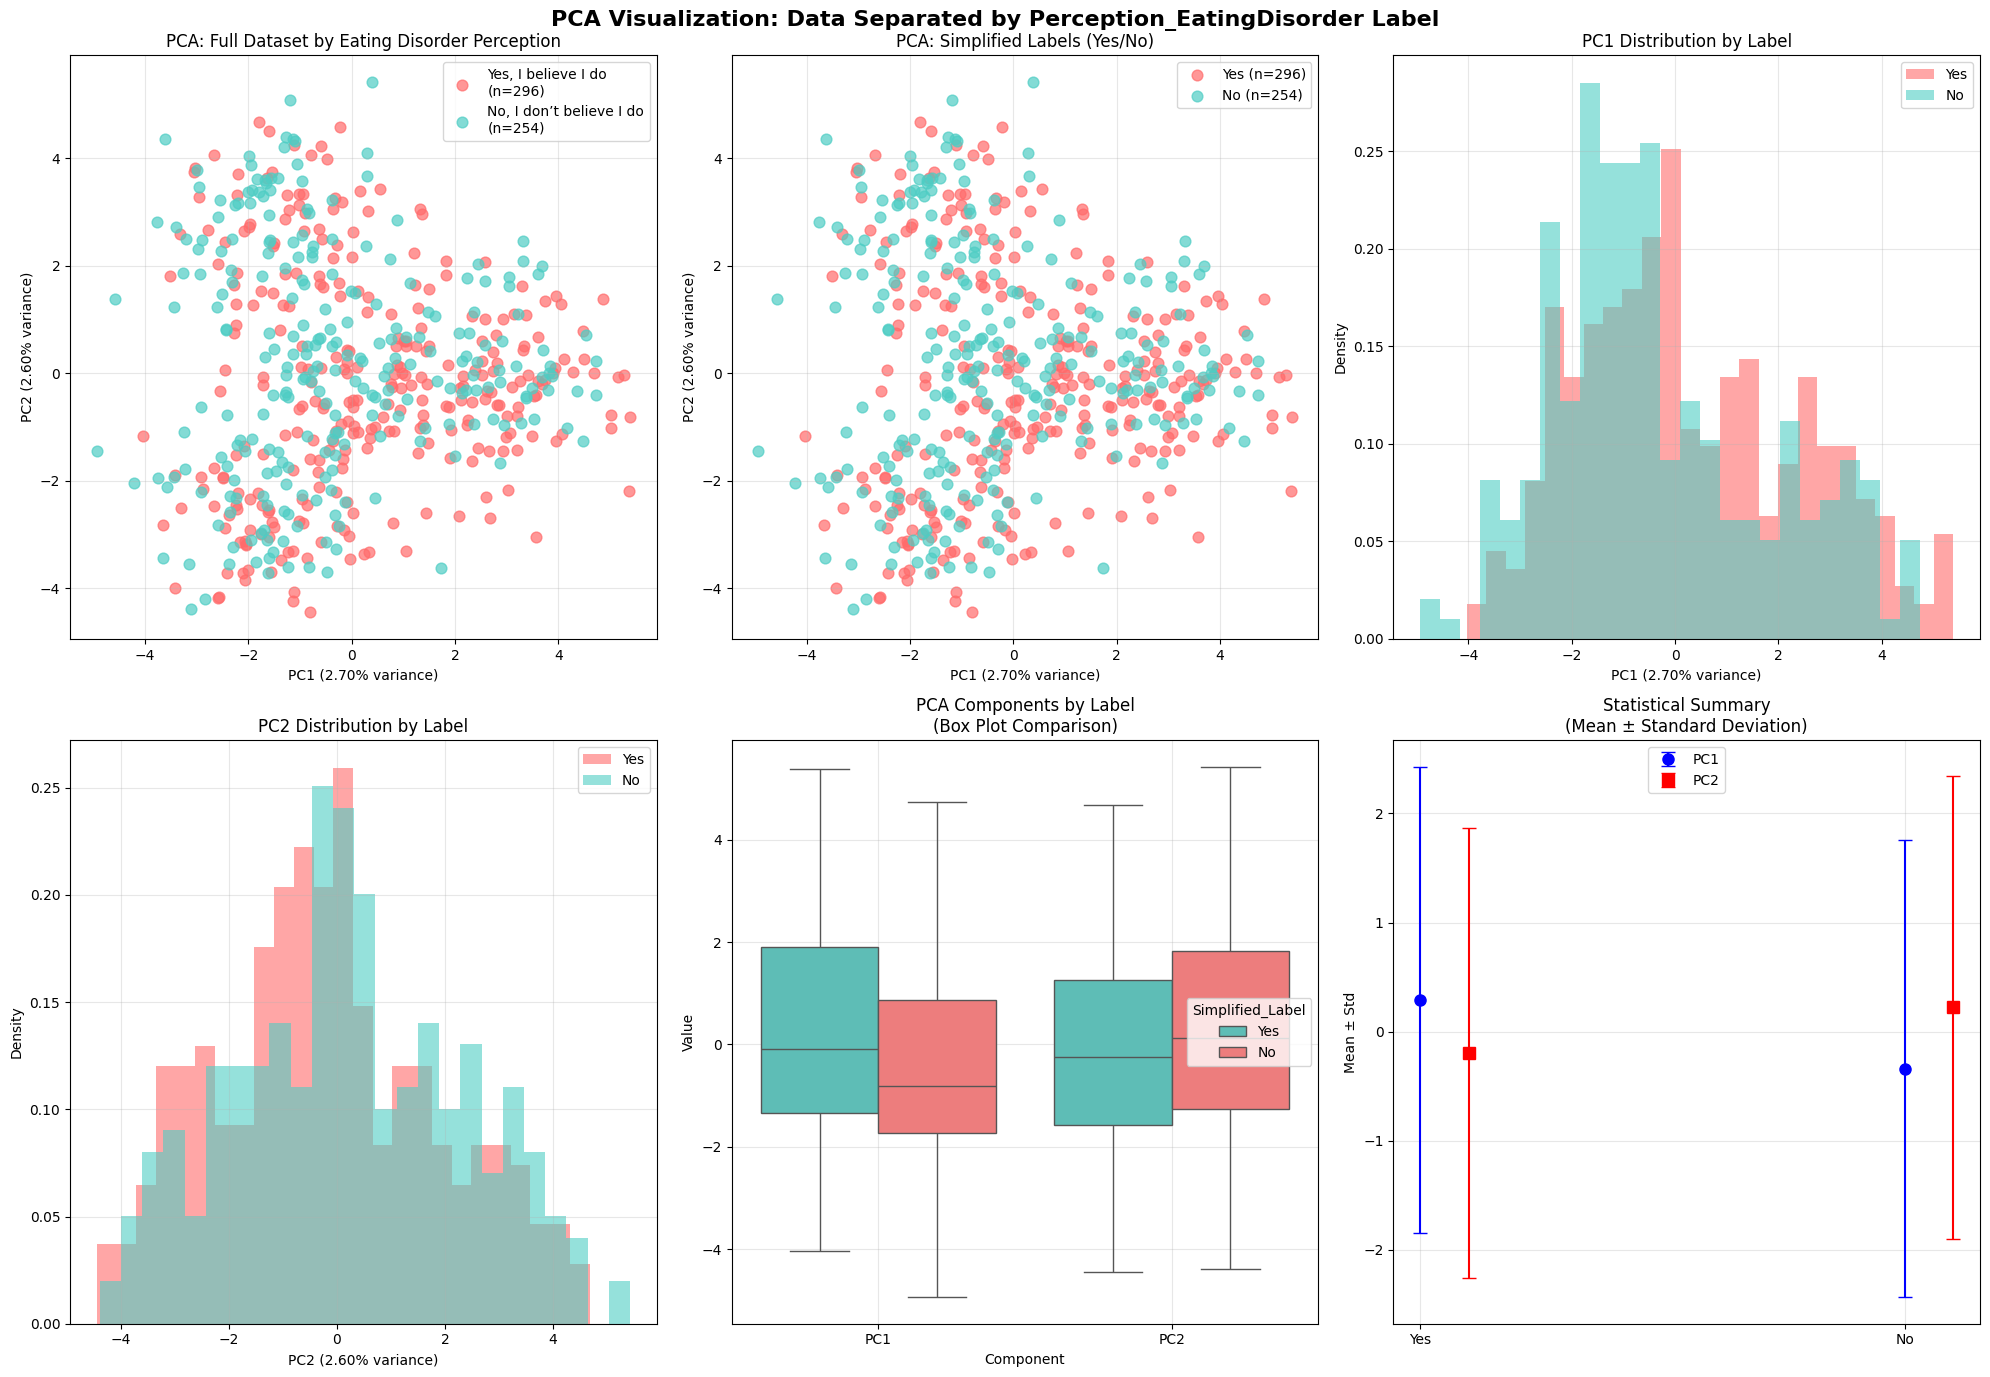


STATISTICAL ANALYSIS BY LABEL

YES Group (n=296):
  PC1 - Mean:    0.291, Std:    2.137
  PC2 - Mean:   -0.192, Std:    2.063
  Distance from origin - Mean:    2.721, Std:    1.230

NO Group (n=254):
  PC1 - Mean:   -0.339, Std:    2.094
  PC2 - Mean:    0.224, Std:    2.123
  Distance from origin - Mean:    2.726, Std:    1.263

STATISTICAL SIGNIFICANCE TESTS

PC1 Comparison (Yes vs No):
  T-statistic:    3.478
  P-value:     0.000545
  Significant: Yes (α = 0.05)

PC2 Comparison (Yes vs No):
  T-statistic:   -2.323
  P-value:     0.020563
  Significant: Yes (α = 0.05)

Effect Size (Cohen's d):
  PC1:    0.297 (Small effect)
  PC2:   -0.199 (Small effect)

INTERPRETATION
• The two groups (No) are somewhat separated in PCA space
• PC1 shows significant difference between groups
• PC2 shows significant difference between groups
• PCA captures 5.3% of total variance in 2 dimensions


In [17]:
# PCA Visualization Separated by Perception_EatingDisorder Label
print("="*80)
print("PCA VISUALIZATION: DATA SEPARATED BY PERCEPTION_EATINGDISORDER LABEL")
print("="*80)

# Apply PCA to ALL data (both positive and negative cases)
all_features_scaled = scaler.fit_transform(X_encoded)  # Scale all features
all_pca = PCA(n_components=2, random_state=42)
all_features_pca = all_pca.fit_transform(all_features_scaled)

print(f"PCA Applied to Full Dataset:")
print(f"  Total samples: {len(df_final)}")
print(f"  PC1 explains: {all_pca.explained_variance_ratio_[0]*100:.2f}% of variance")
print(f"  PC2 explains: {all_pca.explained_variance_ratio_[1]*100:.2f}% of variance")
print(f"  Total variance explained: {sum(all_pca.explained_variance_ratio_)*100:.2f}%")

# Create DataFrame with PCA results and original labels
pca_all_df = pd.DataFrame({
    'PC1': all_features_pca[:, 0],
    'PC2': all_features_pca[:, 1],
    'Perception_EatingDisorder': df['Perception_EatingDisorder'],  # Original labels
    'Target_Encoded': df_final['target']  # Encoded labels (0/1)
})

# Display label distribution
print(f"\nLabel Distribution:")
label_counts = pca_all_df['Perception_EatingDisorder'].value_counts()
for label, count in label_counts.items():
    percentage = count / len(pca_all_df) * 100
    print(f"  {label}: {count} samples ({percentage:.1f}%)")

# Create comprehensive visualization separated by labels
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
fig.suptitle('PCA Visualization: Data Separated by Perception_EatingDisorder Label', 
             fontsize=16, fontweight='bold')

# Define colors for the two groups - check actual label values first
unique_labels = pca_all_df['Perception_EatingDisorder'].unique()
print(f"Unique labels found: {unique_labels}")

# Create color mapping based on actual labels
colors = {}
simplified_colors = {'Yes': '#FF6B6B', 'No': '#4ECDC4'}
for label in unique_labels:
    if 'Yes' in str(label):
        colors[label] = '#FF6B6B'
    else:
        colors[label] = '#4ECDC4'

# 1. Main PCA scatter plot with original labels
ax1 = axes[0, 0]
for label in pca_all_df['Perception_EatingDisorder'].unique():
    mask = pca_all_df['Perception_EatingDisorder'] == label
    count = mask.sum()
    ax1.scatter(pca_all_df.loc[mask, 'PC1'], 
               pca_all_df.loc[mask, 'PC2'],
               c=colors[label], 
               label=f'{label}\n(n={count})',
               alpha=0.7, 
               s=60)

ax1.set_xlabel(f'PC1 ({all_pca.explained_variance_ratio_[0]*100:.2f}% variance)')
ax1.set_ylabel(f'PC2 ({all_pca.explained_variance_ratio_[1]*100:.2f}% variance)')
ax1.set_title('PCA: Full Dataset by Eating Disorder Perception')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Simplified labels (Yes/No)
ax2 = axes[0, 1]
pca_all_df['Simplified_Label'] = pca_all_df['Perception_EatingDisorder'].apply(
    lambda x: 'Yes' if 'Yes' in x else 'No'
)

for label in pca_all_df['Simplified_Label'].unique():
    mask = pca_all_df['Simplified_Label'] == label
    count = mask.sum()
    ax2.scatter(pca_all_df.loc[mask, 'PC1'], 
               pca_all_df.loc[mask, 'PC2'],
               c=simplified_colors[label], 
               label=f'{label} (n={count})',
               alpha=0.7, 
               s=60)

ax2.set_xlabel(f'PC1 ({all_pca.explained_variance_ratio_[0]*100:.2f}% variance)')
ax2.set_ylabel(f'PC2 ({all_pca.explained_variance_ratio_[1]*100:.2f}% variance)')
ax2.set_title('PCA: Simplified Labels (Yes/No)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Density plot for PC1 by label
ax3 = axes[0, 2]
for label in pca_all_df['Simplified_Label'].unique():
    mask = pca_all_df['Simplified_Label'] == label
    ax3.hist(pca_all_df.loc[mask, 'PC1'], 
             bins=25, alpha=0.6, 
             color=simplified_colors[label], 
             label=label,
             density=True)
ax3.set_xlabel(f'PC1 ({all_pca.explained_variance_ratio_[0]*100:.2f}% variance)')
ax3.set_ylabel('Density')
ax3.set_title('PC1 Distribution by Label')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Density plot for PC2 by label
ax4 = axes[1, 0]
for label in pca_all_df['Simplified_Label'].unique():
    mask = pca_all_df['Simplified_Label'] == label
    ax4.hist(pca_all_df.loc[mask, 'PC2'], 
             bins=25, alpha=0.6, 
             color=simplified_colors[label], 
             label=label,
             density=True)
ax4.set_xlabel(f'PC2 ({all_pca.explained_variance_ratio_[1]*100:.2f}% variance)')
ax4.set_ylabel('Density')
ax4.set_title('PC2 Distribution by Label')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Box plot comparison
ax5 = axes[1, 1]
pca_melted_all = pca_all_df.melt(id_vars=['Simplified_Label'], 
                                value_vars=['PC1', 'PC2'], 
                                var_name='Component', 
                                value_name='Value')
sns.boxplot(data=pca_melted_all, x='Component', y='Value', 
           hue='Simplified_Label', palette=[simplified_colors['No'], simplified_colors['Yes']], ax=ax5)
ax5.set_title('PCA Components by Label\n(Box Plot Comparison)')
ax5.grid(True, alpha=0.3)

# 6. Statistical summary plot
ax6 = axes[1, 2]
# Calculate means and standard deviations for each group
stats_data = []
for label in ['Yes', 'No']:
    mask = pca_all_df['Simplified_Label'] == label
    pc1_mean = pca_all_df.loc[mask, 'PC1'].mean()
    pc2_mean = pca_all_df.loc[mask, 'PC2'].mean()
    pc1_std = pca_all_df.loc[mask, 'PC1'].std()
    pc2_std = pca_all_df.loc[mask, 'PC2'].std()
    count = mask.sum()
    
    stats_data.append({
        'Label': label,
        'PC1_Mean': pc1_mean,
        'PC2_Mean': pc2_mean,
        'PC1_Std': pc1_std,
        'PC2_Std': pc2_std,
        'Count': count
    })

stats_df = pd.DataFrame(stats_data)

# Plot means with error bars
x_pos = [0, 1]
ax6.errorbar(x_pos, stats_df['PC1_Mean'], yerr=stats_df['PC1_Std'], 
            fmt='o', capsize=5, label='PC1', color='blue', markersize=8)
ax6.errorbar([x + 0.1 for x in x_pos], stats_df['PC2_Mean'], yerr=stats_df['PC2_Std'], 
            fmt='s', capsize=5, label='PC2', color='red', markersize=8)

ax6.set_xticks(x_pos)
ax6.set_xticklabels(stats_df['Label'])
ax6.set_ylabel('Mean ± Std')
ax6.set_title('Statistical Summary\n(Mean ± Standard Deviation)')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistical analysis
print(f"\n{'='*60}")
print("STATISTICAL ANALYSIS BY LABEL")
print(f"{'='*60}")

for label in ['Yes', 'No']:
    mask = pca_all_df['Simplified_Label'] == label
    data_subset = pca_all_df[mask]
    
    print(f"\n{label.upper()} Group (n={len(data_subset)}):")
    print(f"  PC1 - Mean: {data_subset['PC1'].mean():>8.3f}, Std: {data_subset['PC1'].std():>8.3f}")
    print(f"  PC2 - Mean: {data_subset['PC2'].mean():>8.3f}, Std: {data_subset['PC2'].std():>8.3f}")
    
    # Calculate distance from origin
    distances = np.sqrt(data_subset['PC1']**2 + data_subset['PC2']**2)
    print(f"  Distance from origin - Mean: {distances.mean():>8.3f}, Std: {distances.std():>8.3f}")

# Statistical test to check if groups are significantly different
from scipy import stats

print(f"\n{'='*60}")
print("STATISTICAL SIGNIFICANCE TESTS")
print(f"{'='*60}")

yes_data = pca_all_df[pca_all_df['Simplified_Label'] == 'Yes']
no_data = pca_all_df[pca_all_df['Simplified_Label'] == 'No']

# T-test for PC1
t_stat_pc1, p_val_pc1 = stats.ttest_ind(yes_data['PC1'], no_data['PC1'])
print(f"\nPC1 Comparison (Yes vs No):")
print(f"  T-statistic: {t_stat_pc1:>8.3f}")
print(f"  P-value: {p_val_pc1:>12.6f}")
print(f"  Significant: {'Yes' if p_val_pc1 < 0.05 else 'No'} (α = 0.05)")

# T-test for PC2
t_stat_pc2, p_val_pc2 = stats.ttest_ind(yes_data['PC2'], no_data['PC2'])
print(f"\nPC2 Comparison (Yes vs No):")
print(f"  T-statistic: {t_stat_pc2:>8.3f}")
print(f"  P-value: {p_val_pc2:>12.6f}")
print(f"  Significant: {'Yes' if p_val_pc2 < 0.05 else 'No'} (α = 0.05)")

# Effect size (Cohen's d)
def cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1-1)*group1.var() + (n2-1)*group2.var()) / (n1+n2-2))
    return (group1.mean() - group2.mean()) / pooled_std

cohens_d_pc1 = cohens_d(yes_data['PC1'], no_data['PC1'])
cohens_d_pc2 = cohens_d(yes_data['PC2'], no_data['PC2'])

print(f"\nEffect Size (Cohen's d):")
print(f"  PC1: {cohens_d_pc1:>8.3f} ({'Small' if abs(cohens_d_pc1) < 0.5 else 'Medium' if abs(cohens_d_pc1) < 0.8 else 'Large'} effect)")
print(f"  PC2: {cohens_d_pc2:>8.3f} ({'Small' if abs(cohens_d_pc2) < 0.5 else 'Medium' if abs(cohens_d_pc2) < 0.8 else 'Large'} effect)")

print(f"\n{'='*60}")
print("INTERPRETATION")
print(f"{'='*60}")
print(f"• The two groups ({'Yes' and 'No'}) are {'clearly separated' if p_val_pc1 < 0.01 and p_val_pc2 < 0.01 else 'somewhat separated' if p_val_pc1 < 0.05 or p_val_pc2 < 0.05 else 'not well separated'} in PCA space")
print(f"• PC1 shows {'significant' if p_val_pc1 < 0.05 else 'no significant'} difference between groups")
print(f"• PC2 shows {'significant' if p_val_pc2 < 0.05 else 'no significant'} difference between groups")
print(f"• PCA captures {sum(all_pca.explained_variance_ratio_)*100:.1f}% of total variance in 2 dimensions")

# Additional Analysis: Testing with K=3 Clusters

In [18]:
# Test clustering with K=3 specifically
k3_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
k3_cluster_labels = k3_kmeans.fit_predict(positive_features_scaled)

# Calculate metrics for K=3
k3_silhouette = silhouette_score(positive_features_scaled, k3_cluster_labels)
k3_calinski = calinski_harabasz_score(positive_features_scaled, k3_cluster_labels)

print(f"Results for K=3 clusters:")
print(f"- Silhouette score: {k3_silhouette:.4f}")
print(f"- Calinski-Harabasz score: {k3_calinski:.1f}")
print(f"- Inertia: {k3_kmeans.inertia_:.2f}")

# Cluster distribution for K=3
print(f"\nCluster distribution for K=3:")
k3_cluster_counts = pd.Series(k3_cluster_labels).value_counts().sort_index()
for cluster_id, count in k3_cluster_counts.items():
    percentage = count / len(k3_cluster_labels) * 100
    print(f"  Cluster {cluster_id}: {count} samples ({percentage:.1f}%)")

# Compare with optimal K
print(f"\nComparison:")
print(f"  Optimal K={optimal_k}: Silhouette={final_silhouette:.4f}")
print(f"  K=3: Silhouette={k3_silhouette:.4f}")
print(f"  Difference: {k3_silhouette - final_silhouette:.4f}")

Results for K=3 clusters:
- Silhouette score: 0.0240
- Calinski-Harabasz score: 6.8
- Inertia: 47812.40

Cluster distribution for K=3:
  Cluster 0: 128 samples (43.2%)
  Cluster 1: 61 samples (20.6%)
  Cluster 2: 107 samples (36.1%)

Comparison:
  Optimal K=2: Silhouette=0.0240
  K=3: Silhouette=0.0240
  Difference: -0.0001


In [19]:
# Analyze K=3 cluster characteristics
def analyze_k3_clusters(cluster_data, cluster_labels, feature_names, n_top=10):
    """Analyze features for K=3 clustering"""
    
    # Create temporary dataframe with K=3 clusters
    temp_df = cluster_data.copy()
    temp_df['cluster_k3'] = cluster_labels
    
    cluster_analysis_k3 = {}
    overall_mean = temp_df.drop(['cluster', 'target', 'cluster_k3'], axis=1).mean()
    
    for cluster_id in range(3):
        cluster_mask = temp_df['cluster_k3'] == cluster_id
        cluster_features = temp_df[cluster_mask].drop(['cluster', 'target', 'cluster_k3'], axis=1)
        cluster_mean = cluster_features.mean()
        
        # Calculate deviations from overall mean
        deviations = cluster_mean - overall_mean
        
        top_positive = deviations.nlargest(n_top)
        top_negative = deviations.nsmallest(n_top)
        
        cluster_analysis_k3[cluster_id] = {
            'size': cluster_mask.sum(),
            'top_features': top_positive,
            'least_features': top_negative,
            'cluster_mean': cluster_mean
        }
    
    return cluster_analysis_k3

# Perform K=3 cluster analysis
k3_analysis = analyze_k3_clusters(positive_cases_clustered, k3_cluster_labels, positive_features.columns)

print("="*80)
print("K=3 CLUSTER ANALYSIS RESULTS")
print("="*80)

for cluster_id, analysis in k3_analysis.items():
    print(f"\n{'='*50}")
    print(f"CLUSTER {cluster_id} (n={analysis['size']} samples)")
    print(f"{'='*50}")
    
    print(f"\nTOP 5 FEATURES (Most Above Average):")
    for i, (feature, value) in enumerate(analysis['top_features'].head(5).items(), 1):
        print(f"  {i}. {feature:<50} (+{value:+.4f})")
    
    print(f"\nTOP 5 LEAST FEATURES (Most Below Average):")
    for i, (feature, value) in enumerate(analysis['least_features'].head(5).items(), 1):
        print(f"  {i}. {feature:<50} ({value:+.4f})")

K=3 CLUSTER ANALYSIS RESULTS

CLUSTER 0 (n=128 samples)

TOP 5 FEATURES (Most Above Average):
  1. RefuseFood_WeightConcern_Often                     (++0.3832)
  2. Eat_WhenSeeDeliciousFood_Often                     (++0.3697)
  3. current_city_Mymensingh                            (++0.1463)
  4. current_city_Khulna                                (++0.1296)
  5. DesireToBuy _FromSnackBarOrCafe_Often              (++0.1144)

TOP 5 LEAST FEATURES (Most Below Average):
  1. RefuseFood_WeightConcern_Seldom                    (-0.2354)
  2. Eat_WhenSeeDeliciousFood_Seldom                    (-0.2287)
  3. RefuseFood_WeightConcern_Sometimes                 (-0.1993)
  4. Eat_WhenSeeDeliciousFood_Sometimes                 (-0.1926)
  5. current_city_Sylhet                                (-0.1140)

CLUSTER 1 (n=61 samples)

TOP 5 FEATURES (Most Above Average):
  1. RefuseFood_WeightConcern_Sometimes                 (++0.7515)
  2. Eat_WhenSeeDeliciousFood_Sometimes                 (++0.7419)

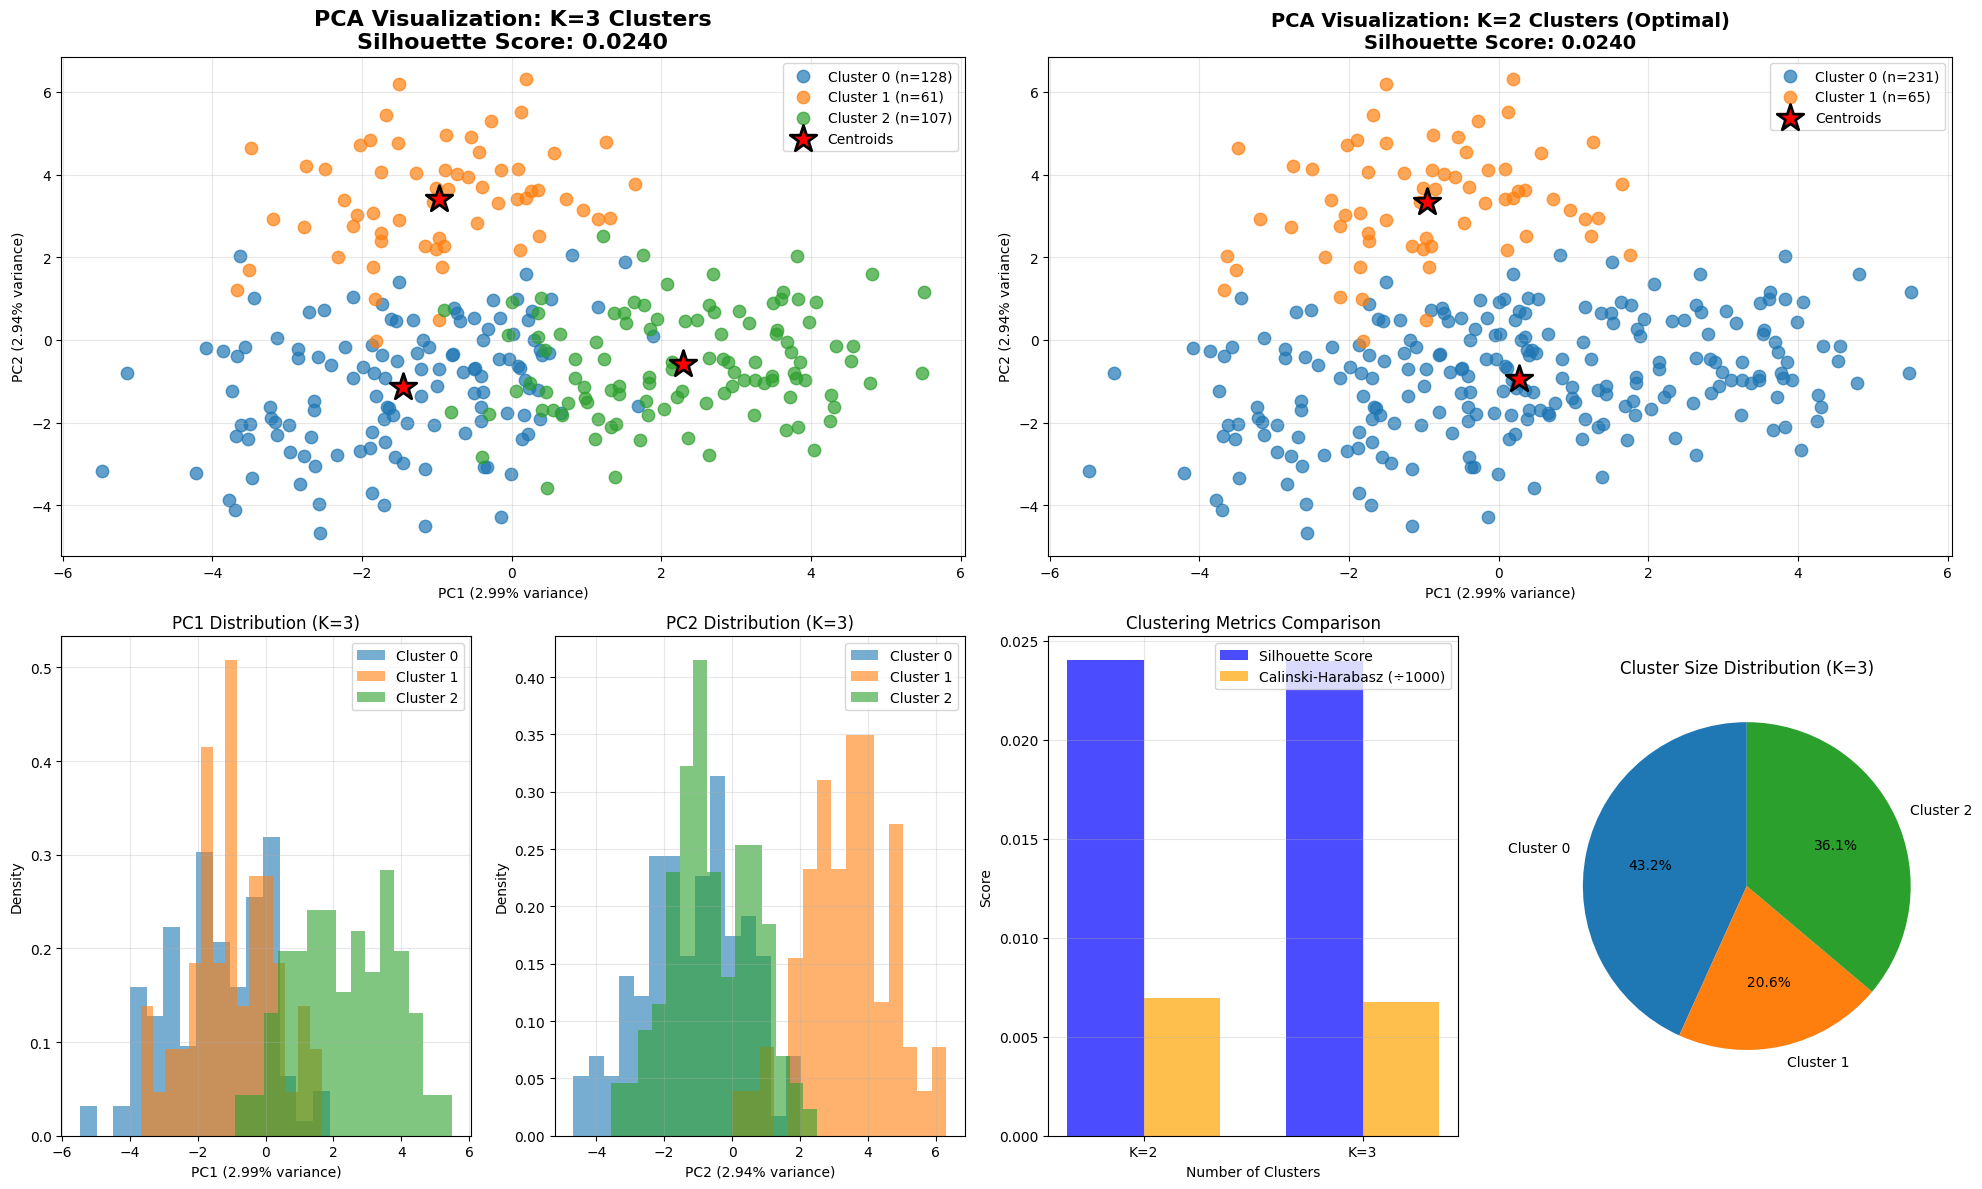

In [23]:
# PCA Visualization for K=3 Clusters
# Create DataFrame for K=3 visualization
pca_df_k3 = pd.DataFrame({
    'PC1': positive_features_pca[:, 0],
    'PC2': positive_features_pca[:, 1], 
    'Cluster_K3': k3_cluster_labels
})

# Define colors for 3 clusters
k3_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
k3_cluster_names = [f'Cluster {i}' for i in range(3)]

# Create comprehensive visualization comparing K=3 with optimal K
fig = plt.figure(figsize=(20, 12))

# Main K=3 plot
ax1 = plt.subplot(2, 4, (1, 2))
for i in range(3):
    cluster_mask = pca_df_k3['Cluster_K3'] == i
    cluster_size = cluster_mask.sum()
    plt.scatter(pca_df_k3.loc[cluster_mask, 'PC1'], 
               pca_df_k3.loc[cluster_mask, 'PC2'],
               c=k3_colors[i], 
               label=f'{k3_cluster_names[i]} (n={cluster_size})',
               alpha=0.7, 
               s=80)

# Add K=3 cluster centers
k3_centers_pca = pca.transform(k3_kmeans.cluster_centers_)
for i, center in enumerate(k3_centers_pca):
    plt.scatter(center[0], center[1], 
               c='red', marker='*', s=400, 
               edgecolors='black', linewidth=2,
               label='Centroids' if i == 0 else "")

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.title(f'PCA Visualization: K=3 Clusters\nSilhouette Score: {k3_silhouette:.4f}', 
          fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Comparison with optimal K
ax2 = plt.subplot(2, 4, (3, 4))
for i in range(optimal_k):
    cluster_mask = pca_df['Cluster'] == i
    cluster_size = cluster_mask.sum()
    plt.scatter(pca_df.loc[cluster_mask, 'PC1'], 
               pca_df.loc[cluster_mask, 'PC2'],
               c=cluster_colors[i], 
               label=f'Cluster {i} (n={cluster_size})',
               alpha=0.7, 
               s=80)

# Add optimal K cluster centers
for i, center in enumerate(cluster_centers_pca):
    plt.scatter(center[0], center[1], 
               c='red', marker='*', s=400,
               edgecolors='black', linewidth=2,
               label='Centroids' if i == 0 else "")

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.title(f'PCA Visualization: K={optimal_k} Clusters (Optimal)\nSilhouette Score: {final_silhouette:.4f}', 
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# PC1 distribution for K=3
plt.subplot(2, 4, 5)
for i in range(3):
    cluster_mask = pca_df_k3['Cluster_K3'] == i
    plt.hist(pca_df_k3.loc[cluster_mask, 'PC1'], 
             bins=15, alpha=0.6, 
             color=k3_colors[i], 
             label=f'Cluster {i}',
             density=True)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel('Density')
plt.title('PC1 Distribution (K=3)')
plt.legend()
plt.grid(True, alpha=0.3)

# PC2 distribution for K=3
plt.subplot(2, 4, 6)
for i in range(3):
    cluster_mask = pca_df_k3['Cluster_K3'] == i
    plt.hist(pca_df_k3.loc[cluster_mask, 'PC2'], 
             bins=15, alpha=0.6, 
             color=k3_colors[i], 
             label=f'Cluster {i}',
             density=True)
plt.xlabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.ylabel('Density')
plt.title('PC2 Distribution (K=3)')
plt.legend()
plt.grid(True, alpha=0.3)

# Metrics comparison
plt.subplot(2, 4, 7)
metrics_comparison = pd.DataFrame({
    'K': [optimal_k, 3],
    'Silhouette_Score': [final_silhouette, k3_silhouette],
    'Calinski_Harabasz': [calinski_scores[optimal_k-2], k3_calinski]
})

x = np.arange(len(metrics_comparison))
width = 0.35

plt.bar(x - width/2, metrics_comparison['Silhouette_Score'], width, 
        label='Silhouette Score', alpha=0.7, color='blue')
plt.bar(x + width/2, metrics_comparison['Calinski_Harabasz']/1000, width, 
        label='Calinski-Harabasz (÷1000)', alpha=0.7, color='orange')

plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Clustering Metrics Comparison')
plt.xticks(x, [f'K={optimal_k}', 'K=3'])
plt.legend()
plt.grid(True, alpha=0.3)

# Cluster size comparison
plt.subplot(2, 4, 8)
cluster_sizes_k3 = [k3_analysis[i]['size'] for i in range(3)]

plt.pie(cluster_sizes_k3, labels=[f'Cluster {i}' for i in range(3)], 
        colors=k3_colors, autopct='%1.1f%%', startangle=90)
plt.title('Cluster Size Distribution (K=3)')

plt.tight_layout()
plt.show()

In [24]:
# Statistical Analysis and Summary for K=3
print("="*80)
print("STATISTICAL ANALYSIS: K=3 vs OPTIMAL K COMPARISON")
print("="*80)

print(f"\nClustering Performance Metrics:")
print(f"{'Metric':<25} {'K=' + str(optimal_k):<15} {'K=3':<15} {'Better':<10}")
print("-" * 70)
print(f"{'Silhouette Score':<25} {final_silhouette:<15.4f} {k3_silhouette:<15.4f} {'K=' + str(optimal_k if final_silhouette > k3_silhouette else '3'):<10}")
print(f"{'Calinski-Harabasz':<25} {calinski_scores[optimal_k-2]:<15.1f} {k3_calinski:<15.1f} {'K=' + str(optimal_k if calinski_scores[optimal_k-2] > k3_calinski else '3'):<10}")

print(f"\nCluster Statistics Comparison:")

# K=3 cluster statistics
print(f"\nK=3 Cluster Statistics:")
for i in range(3):
    cluster_data_k3 = pca_df_k3[pca_df_k3['Cluster_K3'] == i]
    print(f"  Cluster {i} (n={len(cluster_data_k3)}):")
    print(f"    PC1: μ={cluster_data_k3['PC1'].mean():.3f}, σ={cluster_data_k3['PC1'].std():.3f}")
    print(f"    PC2: μ={cluster_data_k3['PC2'].mean():.3f}, σ={cluster_data_k3['PC2'].std():.3f}")

# Calculate inter-cluster distances for K=3
print(f"\nK=3 Cluster Separation Analysis:")
for i in range(3):
    for j in range(i+1, 3):
        distance = np.sqrt((k3_centers_pca[i][0] - k3_centers_pca[j][0])**2 + 
                          (k3_centers_pca[i][1] - k3_centers_pca[j][1])**2)
        print(f"  Distance between Cluster {i} and Cluster {j}: {distance:.3f}")

# Overall assessment
print(f"\nOverall Assessment:")
if k3_silhouette > final_silhouette:
    print(f"✓ K=3 shows BETTER clustering quality (higher silhouette score)")
    print(f"  - Improvement: {k3_silhouette - final_silhouette:.4f}")
else:
    print(f"✗ K={optimal_k} shows BETTER clustering quality (higher silhouette score)")
    print(f"  - K=3 is worse by: {final_silhouette - k3_silhouette:.4f}")

print(f"\nRecommendation:")
if abs(k3_silhouette - final_silhouette) < 0.01:
    print("  The difference is minimal. Consider domain knowledge for final choice.")
elif k3_silhouette > final_silhouette:
    print("  K=3 appears to be a better choice for this dataset.")
else:
    print(f"  K={optimal_k} remains the better choice based on silhouette score.")

# Save K=3 results
k3_results_list = []
for cluster_id, analysis in k3_analysis.items():
    for rank, (feature, deviation) in enumerate(analysis['top_features'].items(), 1):
        k3_results_list.append({
            'Cluster_ID': cluster_id,
            'Cluster_Size': analysis['size'],
            'Feature_Type': 'Top',
            'Rank': rank,
            'Feature_Name': feature,
            'Deviation_from_Average': deviation,
            'Cluster_Mean_Value': analysis['cluster_mean'][feature]
        })
    
    for rank, (feature, deviation) in enumerate(analysis['least_features'].items(), 1):
        k3_results_list.append({
            'Cluster_ID': cluster_id,
            'Cluster_Size': analysis['size'],
            'Feature_Type': 'Least', 
            'Rank': rank,
            'Feature_Name': feature,
            'Deviation_from_Average': deviation,
            'Cluster_Mean_Value': analysis['cluster_mean'][feature]
        })

k3_results_df = pd.DataFrame(k3_results_list)
k3_results_df.to_csv('cluster_analysis_k3_results.csv', index=False)
print(f"\nK=3 cluster analysis saved to 'cluster_analysis_k3_results.csv'")

# Final summary
print(f"\nFinal Summary:")
print(f"- Original optimal K: {optimal_k} (Silhouette: {final_silhouette:.4f})")
print(f"- K=3 performance: Silhouette: {k3_silhouette:.4f}")
print(f"- Total positive cases: {len(positive_cases_clustered)}")
print(f"- PCA variance explained: {sum(pca.explained_variance_ratio_)*100:.2f}%")

STATISTICAL ANALYSIS: K=3 vs OPTIMAL K COMPARISON

Clustering Performance Metrics:
Metric                    K=2             K=3             Better    
----------------------------------------------------------------------
Silhouette Score          0.0240          0.0240          K=2       
Calinski-Harabasz         7.0             6.8             K=2       

Cluster Statistics Comparison:

K=3 Cluster Statistics:
  Cluster 0 (n=128):
    PC1: μ=-1.452, σ=1.492
    PC2: μ=-1.136, σ=1.510
  Cluster 1 (n=61):
    PC1: μ=-0.976, σ=1.252
    PC2: μ=3.419, σ=1.303
  Cluster 2 (n=107):
    PC1: μ=2.294, σ=1.463
    PC2: μ=-0.591, σ=1.233

K=3 Cluster Separation Analysis:
  Distance between Cluster 0 and Cluster 1: 4.579
  Distance between Cluster 0 and Cluster 2: 3.786
  Distance between Cluster 1 and Cluster 2: 5.174

Overall Assessment:
✗ K=2 shows BETTER clustering quality (higher silhouette score)
  - K=3 is worse by: 0.0001

Recommendation:
  The difference is minimal. Consider domain k

# Machine Learning Classification Models

Let's build and evaluate classification models to predict eating disorder perception based on the features.

In [14]:
# Import machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                           precision_score, recall_score, f1_score, roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("MACHINE LEARNING CLASSIFICATION ANALYSIS")
print("="*80)

# Prepare the data for machine learning
X = X_encoded  # Features (169 one-hot encoded features)
y = df_final['target']  # Target variable (0 = No, 1 = Yes)

print(f"Dataset for ML:")
print(f"  Features (X): {X.shape}")
print(f"  Target (y): {y.shape}")
print(f"  Target distribution: {y.value_counts().to_dict()}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData split:")
print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Testing set: {X_test.shape[0]} samples")
print(f"  Training target distribution: {y_train.value_counts().to_dict()}")
print(f"  Testing target distribution: {y_test.value_counts().to_dict()}")

# Scale the features for algorithms that need it
from sklearn.preprocessing import StandardScaler
scaler_ml = StandardScaler()
X_train_scaled = scaler_ml.fit_transform(X_train)
X_test_scaled = scaler_ml.transform(X_test)

MACHINE LEARNING CLASSIFICATION ANALYSIS
Dataset for ML:
  Features (X): (550, 169)
  Target (y): (550,)
  Target distribution: {1: 296, 0: 254}

Data split:
  Training set: 440 samples
  Testing set: 110 samples
  Training target distribution: {1: 237, 0: 203}
  Testing target distribution: {1: 59, 0: 51}


In [15]:
# Define multiple classification models to compare
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

# Store results for comparison
results = {}
predictions = {}

print("Training and evaluating models...")
print("="*60)

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Use scaled data for algorithms that benefit from it
    if name in ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors']:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train
        X_test_use = X_test
    
    # Train the model
    model.fit(X_train_use, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_use)
    y_pred_proba = model.predict_proba(X_test_use)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # ROC AUC (if probability prediction is available)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_use, y_train, cv=5, scoring='accuracy')
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    predictions[name] = y_pred
    
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    if roc_auc:
        print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  CV Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

print(f"\n{'='*60}")
print("Model training completed!")

Training and evaluating models...

Training Random Forest...
  Accuracy: 0.7364
  Precision: 0.7344
  Recall: 0.7966
  F1-Score: 0.7642
  ROC AUC: 0.8137
  CV Score: 0.6886 (±0.0506)

Training Logistic Regression...
  Accuracy: 0.8182
  Precision: 0.8305
  Recall: 0.8305
  F1-Score: 0.8305
  ROC AUC: 0.8617
  CV Score: 0.7636 (±0.0572)

Training Gradient Boosting...
  Accuracy: 0.7182
  Precision: 0.7258
  Recall: 0.7627
  F1-Score: 0.7438
  ROC AUC: 0.8043
  CV Score: 0.6886 (±0.0091)

Training Support Vector Machine...
  Accuracy: 0.7636
  Precision: 0.8113
  Recall: 0.7288
  F1-Score: 0.7679
  ROC AUC: 0.8508
  CV Score: 0.7727 (±0.0373)

Training K-Nearest Neighbors...
  Accuracy: 0.5909
  Precision: 0.5833
  Recall: 0.8305
  F1-Score: 0.6853
  ROC AUC: 0.7027
  CV Score: 0.6477 (±0.0072)

Training Naive Bayes...
  Accuracy: 0.7364
  Precision: 0.7586
  Recall: 0.7458
  F1-Score: 0.7521
  ROC AUC: 0.8478
  CV Score: 0.7250 (±0.0396)

Model training completed!


MODEL PERFORMANCE COMPARISON
Performance Metrics Summary:
                    Model  Accuracy  Precision  Recall  F1-Score  ROC AUC  \
1     Logistic Regression    0.8182     0.8305  0.8305    0.8305   0.8617   
3  Support Vector Machine    0.7636     0.8113  0.7288    0.7679   0.8508   
0           Random Forest    0.7364     0.7344  0.7966    0.7642   0.8137   
5             Naive Bayes    0.7364     0.7586  0.7458    0.7521   0.8478   
2       Gradient Boosting    0.7182     0.7258  0.7627    0.7438   0.8043   
4     K-Nearest Neighbors    0.5909     0.5833  0.8305    0.6853   0.7027   

   CV Mean  CV Std  
1   0.7636  0.0572  
3   0.7727  0.0373  
0   0.6886  0.0506  
5   0.7250  0.0396  
2   0.6886  0.0091  
4   0.6477  0.0072  

Best performing model: Logistic Regression
Best F1-Score: 0.8305


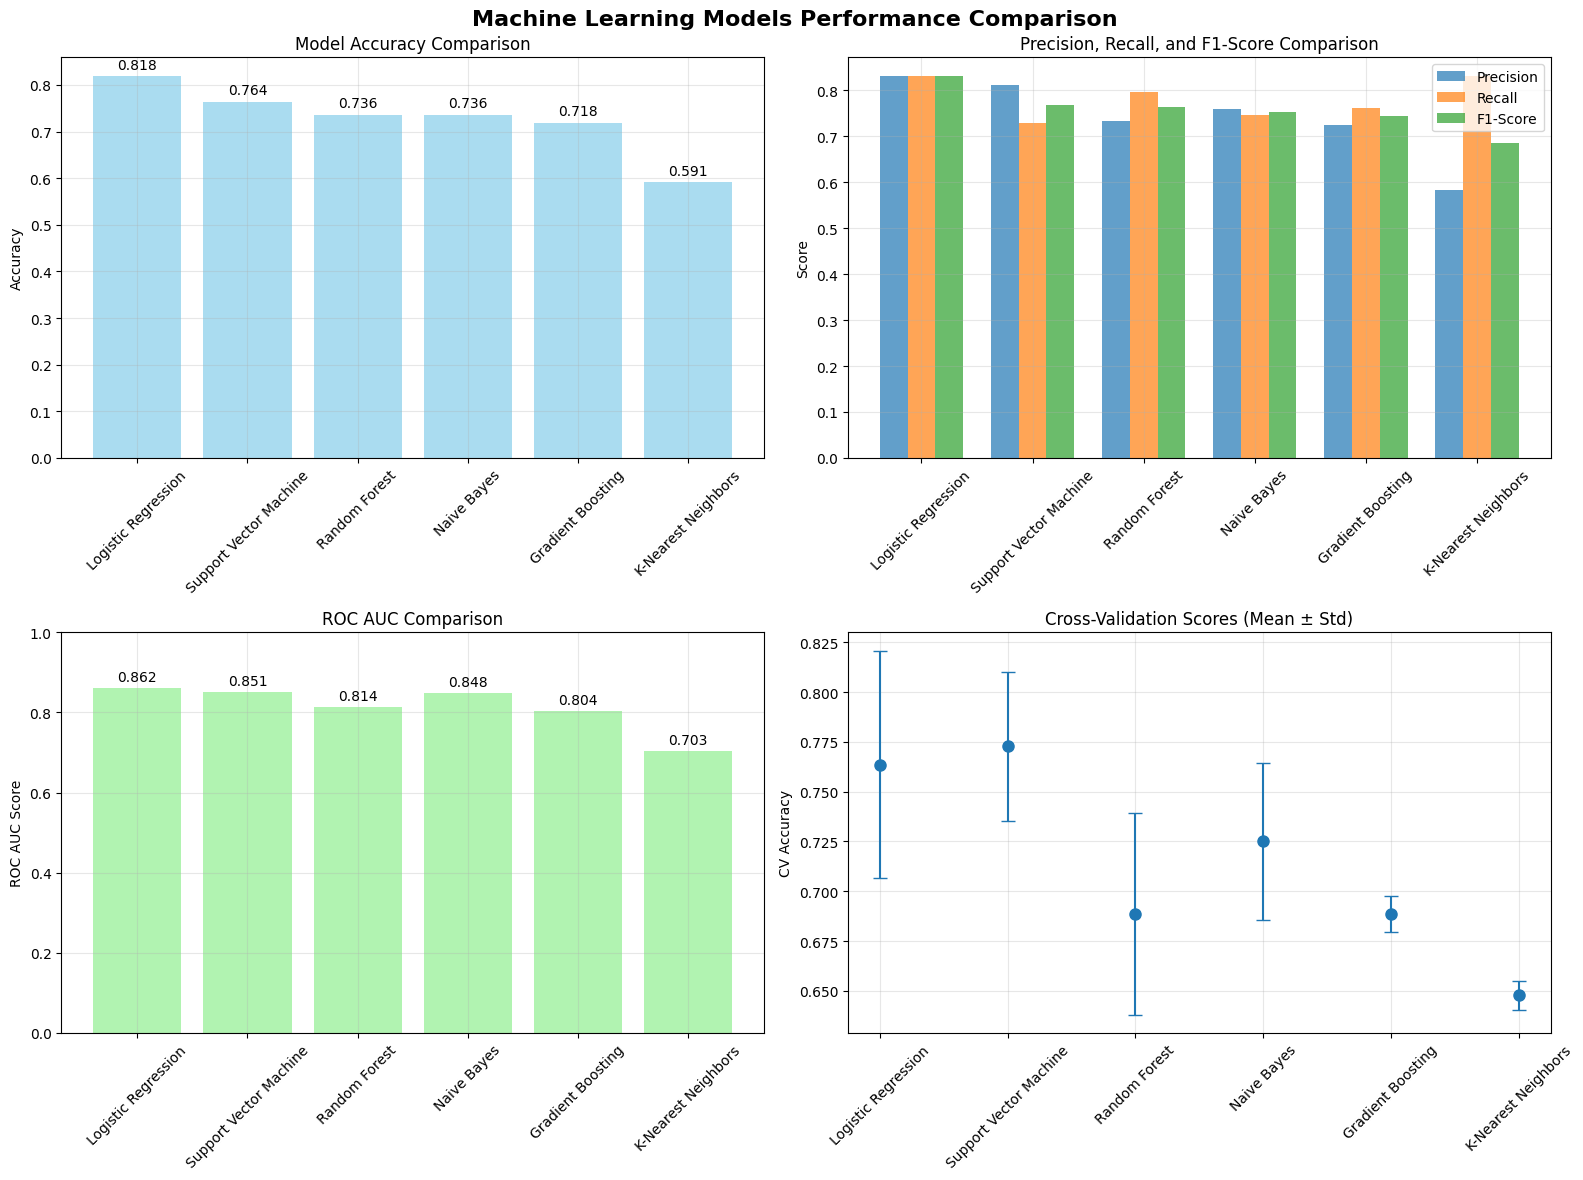

In [16]:
# Model Performance Comparison
print("="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'Precision': [results[name]['precision'] for name in results.keys()],
    'Recall': [results[name]['recall'] for name in results.keys()],
    'F1-Score': [results[name]['f1_score'] for name in results.keys()],
    'ROC AUC': [results[name]['roc_auc'] if results[name]['roc_auc'] else 0 for name in results.keys()],
    'CV Mean': [results[name]['cv_mean'] for name in results.keys()],
    'CV Std': [results[name]['cv_std'] for name in results.keys()]
})

# Sort by F1-Score (good overall metric)
comparison_df = comparison_df.sort_values('F1-Score', ascending=False)

print("Performance Metrics Summary:")
print(comparison_df.round(4))

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']

print(f"\nBest performing model: {best_model_name}")
print(f"Best F1-Score: {comparison_df.iloc[0]['F1-Score']:.4f}")

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Machine Learning Models Performance Comparison', fontsize=16, fontweight='bold')

# 1. Accuracy comparison
ax1 = axes[0, 0]
bars1 = ax1.bar(comparison_df['Model'], comparison_df['Accuracy'], 
               color='skyblue', alpha=0.7)
ax1.set_title('Model Accuracy Comparison')
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)
# Add value labels on bars
for bar, value in zip(bars1, comparison_df['Accuracy']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
            f'{value:.3f}', ha='center', va='bottom')

# 2. Precision, Recall, F1-Score comparison
ax2 = axes[0, 1]
x = np.arange(len(comparison_df))
width = 0.25
ax2.bar(x - width, comparison_df['Precision'], width, label='Precision', alpha=0.7)
ax2.bar(x, comparison_df['Recall'], width, label='Recall', alpha=0.7)
ax2.bar(x + width, comparison_df['F1-Score'], width, label='F1-Score', alpha=0.7)
ax2.set_title('Precision, Recall, and F1-Score Comparison')
ax2.set_ylabel('Score')
ax2.set_xticks(x)
ax2.set_xticklabels(comparison_df['Model'], rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. ROC AUC comparison (exclude models without probability prediction)
ax3 = axes[1, 0]
roc_data = comparison_df[comparison_df['ROC AUC'] > 0]
bars3 = ax3.bar(roc_data['Model'], roc_data['ROC AUC'], 
               color='lightgreen', alpha=0.7)
ax3.set_title('ROC AUC Comparison')
ax3.set_ylabel('ROC AUC Score')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 1)
# Add value labels
for bar, value in zip(bars3, roc_data['ROC AUC']):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
            f'{value:.3f}', ha='center', va='bottom')

# 4. Cross-validation scores with error bars
ax4 = axes[1, 1]
ax4.errorbar(range(len(comparison_df)), comparison_df['CV Mean'], 
            yerr=comparison_df['CV Std'], fmt='o', capsize=5, markersize=8)
ax4.set_title('Cross-Validation Scores (Mean ± Std)')
ax4.set_ylabel('CV Accuracy')
ax4.set_xticks(range(len(comparison_df)))
ax4.set_xticklabels(comparison_df['Model'], rotation=45)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

CONFUSION MATRIX AND CLASSIFICATION REPORTS


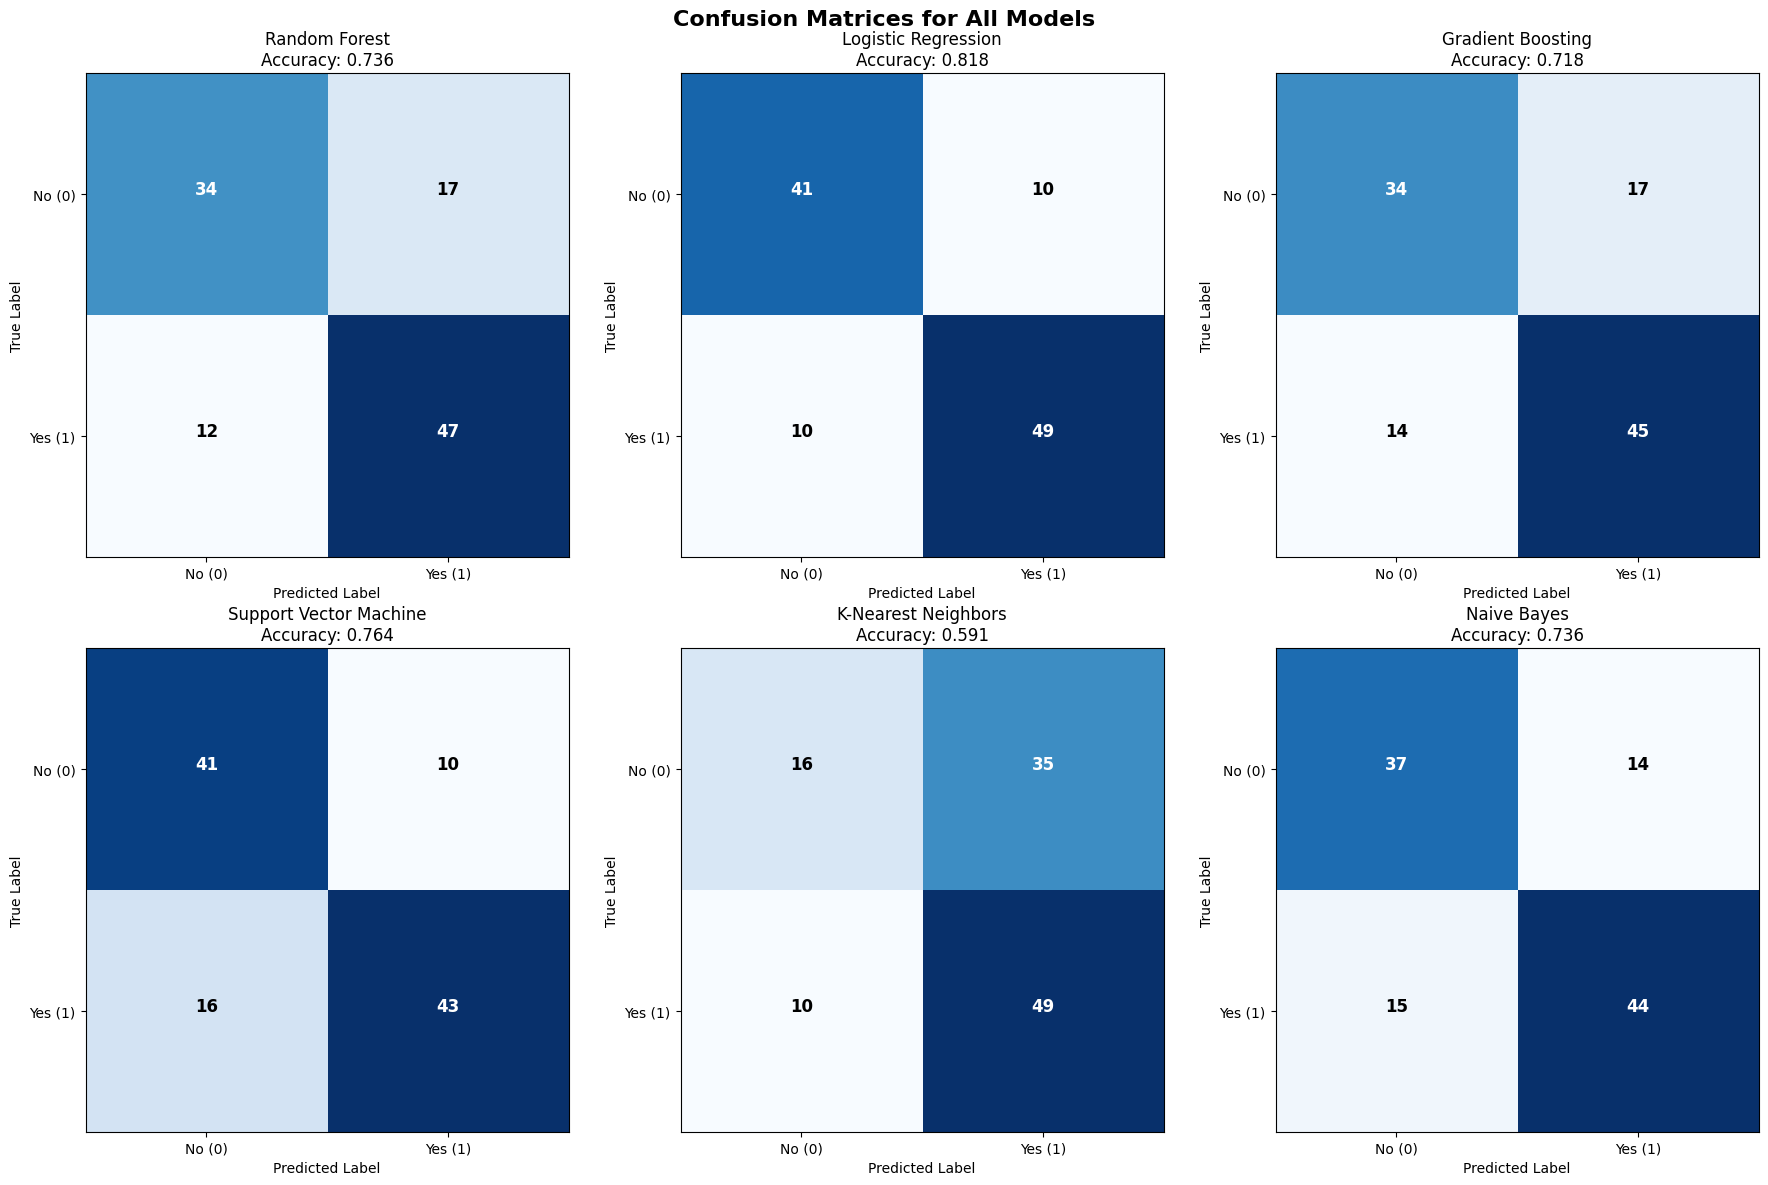


DETAILED ANALYSIS: Logistic Regression

Confusion Matrix for Logistic Regression:
                 Predicted
              No (0)  Yes (1)
Actual No (0)     41      10
       Yes (1)    10      49

Detailed Metrics for Logistic Regression:
  True Negatives (TN):  41
  False Positives (FP): 10
  False Negatives (FN): 10
  True Positives (TP):  49
  
  Sensitivity (Recall): 0.8305
  Specificity:          0.8039
  Precision (PPV):      0.8305
  Negative Pred. Value: 0.8039

Classification Report for Logistic Regression:
                     precision    recall  f1-score   support

 No Eating Disorder       0.80      0.80      0.80        51
Yes Eating Disorder       0.83      0.83      0.83        59

           accuracy                           0.82       110
          macro avg       0.82      0.82      0.82       110
       weighted avg       0.82      0.82      0.82       110



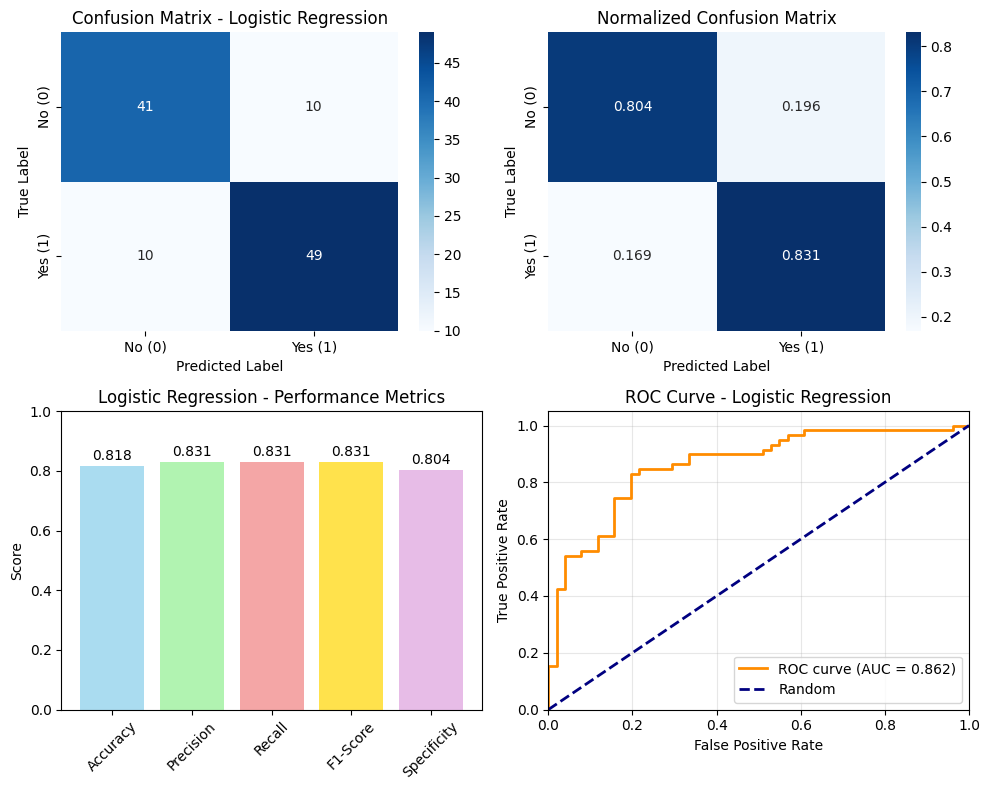

In [12]:
# Confusion Matrix and Classification Report Visualization
print("="*80)
print("CONFUSION MATRIX AND CLASSIFICATION REPORTS")
print("="*80)

# Create confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Confusion Matrices for All Models', fontsize=16, fontweight='bold')

model_names = list(results.keys())
for idx, (name, result) in enumerate(results.items()):
    row = idx // 3
    col = idx % 3
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, result['y_pred'])
    
    # Plot confusion matrix
    ax = axes[row, col]
    im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
    ax.set_title(f'{name}\nAccuracy: {result["accuracy"]:.3f}')
    
    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                   horizontalalignment="center",
                   color="white" if cm[i, j] > thresh else "black",
                   fontsize=12, fontweight='bold')
    
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['No (0)', 'Yes (1)'])
    ax.set_yticklabels(['No (0)', 'Yes (1)'])

plt.tight_layout()
plt.show()

# Detailed analysis for the best model
print(f"\n{'='*60}")
print(f"DETAILED ANALYSIS: {best_model_name}")
print(f"{'='*60}")

best_y_pred = results[best_model_name]['y_pred']
best_cm = confusion_matrix(y_test, best_y_pred)

print(f"\nConfusion Matrix for {best_model_name}:")
print(f"                 Predicted")
print(f"              No (0)  Yes (1)")
print(f"Actual No (0)   {best_cm[0,0]:4d}    {best_cm[0,1]:4d}")
print(f"       Yes (1)  {best_cm[1,0]:4d}    {best_cm[1,1]:4d}")

# Calculate additional metrics
tn, fp, fn, tp = best_cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)  # Same as recall
ppv = tp / (tp + fp)  # Same as precision
npv = tn / (tn + fn)

print(f"\nDetailed Metrics for {best_model_name}:")
print(f"  True Negatives (TN):  {tn}")
print(f"  False Positives (FP): {fp}")
print(f"  False Negatives (FN): {fn}")
print(f"  True Positives (TP):  {tp}")
print(f"  ")
print(f"  Sensitivity (Recall): {sensitivity:.4f}")
print(f"  Specificity:          {specificity:.4f}")
print(f"  Precision (PPV):      {ppv:.4f}")
print(f"  Negative Pred. Value: {npv:.4f}")

# Classification report for best model
print(f"\nClassification Report for {best_model_name}:")
print("="*50)
print(classification_report(y_test, best_y_pred, 
                          target_names=['No Eating Disorder', 'Yes Eating Disorder']))

# Create enhanced confusion matrix visualization for best model
plt.figure(figsize=(10, 8))

# Confusion matrix heatmap
plt.subplot(2, 2, 1)
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['No (0)', 'Yes (1)'], 
           yticklabels=['No (0)', 'Yes (1)'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Normalized confusion matrix
plt.subplot(2, 2, 2)
cm_normalized = best_cm.astype('float') / best_cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Blues',
           xticklabels=['No (0)', 'Yes (1)'], 
           yticklabels=['No (0)', 'Yes (1)'])
plt.title('Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Metrics comparison bar chart
plt.subplot(2, 2, 3)
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity']
metrics_values = [results[best_model_name]['accuracy'], 
                 results[best_model_name]['precision'],
                 results[best_model_name]['recall'],
                 results[best_model_name]['f1_score'],
                 specificity]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum']
bars = plt.bar(metrics_names, metrics_values, color=colors, alpha=0.7)
plt.title(f'{best_model_name} - Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
# Add value labels on bars
for bar, value in zip(bars, metrics_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
            f'{value:.3f}', ha='center', va='bottom')

# ROC Curve (if available)
plt.subplot(2, 2, 4)
if results[best_model_name]['y_pred_proba'] is not None:
    fpr, tpr, _ = roc_curve(y_test, results[best_model_name]['y_pred_proba'])
    roc_auc = results[best_model_name]['roc_auc']
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {best_model_name}')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'ROC Curve\nNot Available', 
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes, fontsize=12)
    plt.title('ROC Curve - Not Available')

plt.tight_layout()
plt.show()

FEATURE IMPORTANCE ANALYSIS


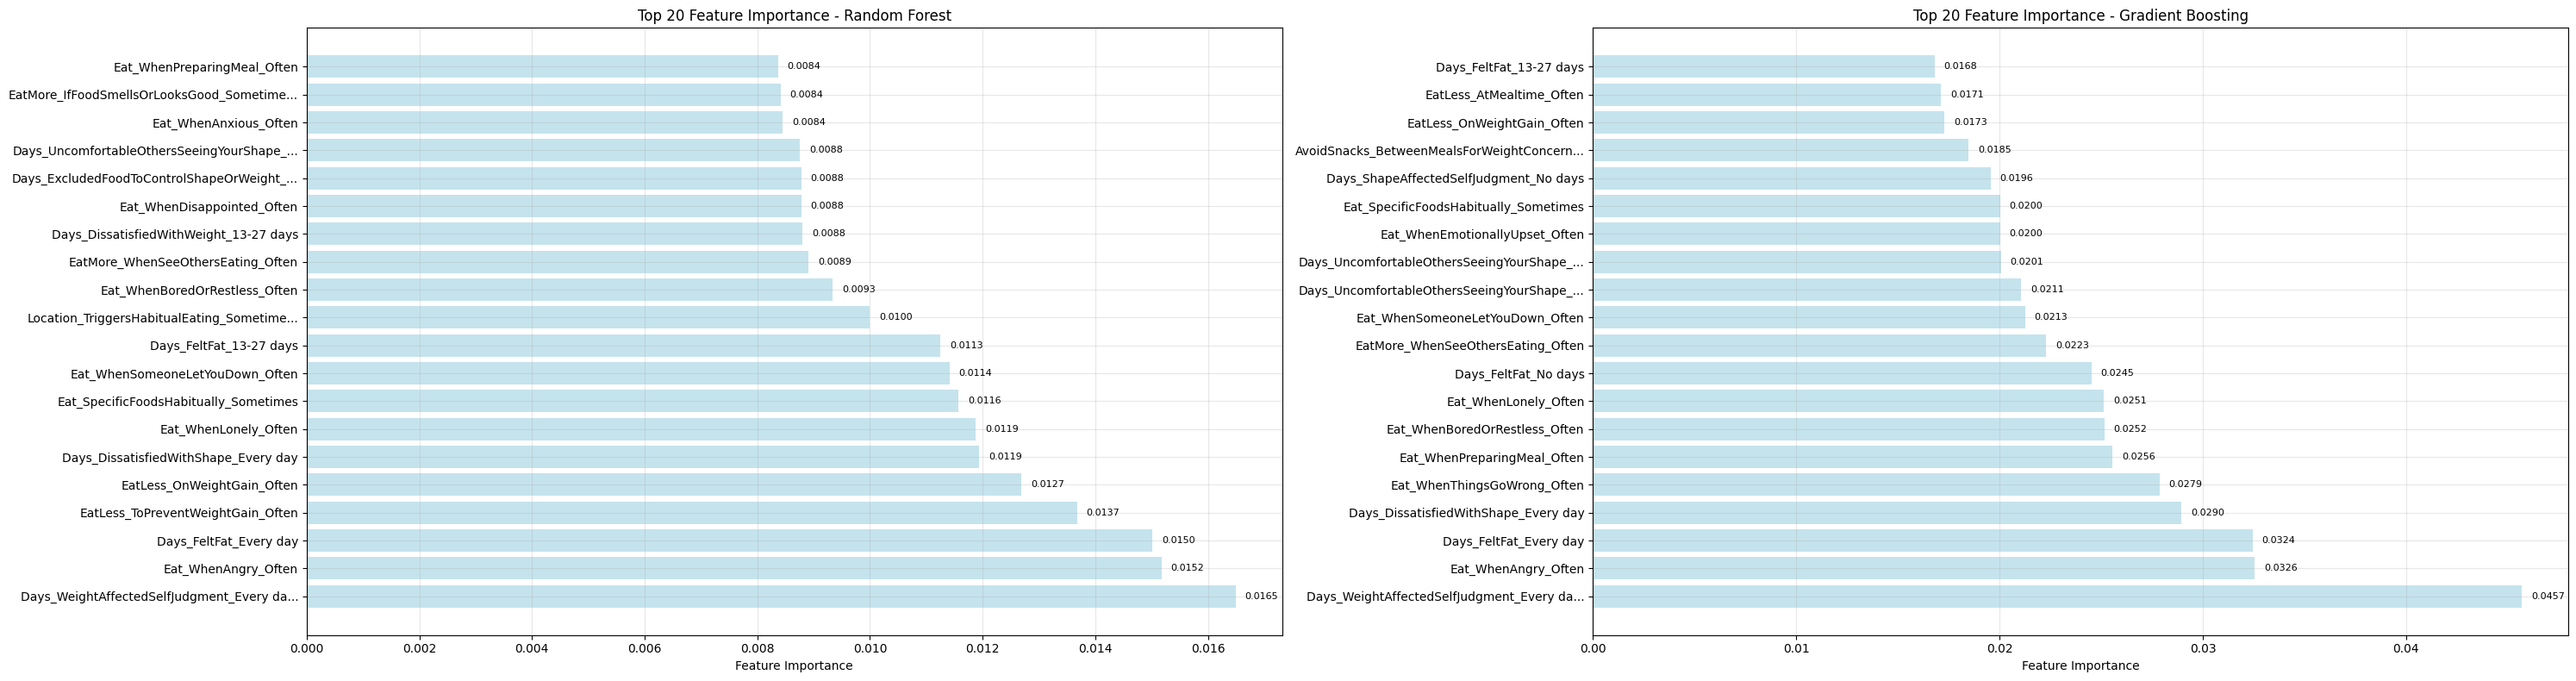


Top 10 Most Important Features - Random Forest:
------------------------------------------------------------
 1. Days_WeightAffectedSelfJudgment_Every day     0.016490
 2. Eat_WhenAngry_Often                           0.015172
 3. Days_FeltFat_Every day                        0.015012
 4. EatLess_ToPreventWeightGain_Often             0.013677
 5. EatLess_OnWeightGain_Often                    0.012691
 6. Days_DissatisfiedWithShape_Every day          0.011942
 7. Eat_WhenLonely_Often                          0.011877
 8. Eat_SpecificFoodsHabitually_Sometimes         0.011572
 9. Eat_WhenSomeoneLetYouDown_Often               0.011412
10. Days_FeltFat_13-27 days                       0.011251

Top 10 Most Important Features - Gradient Boosting:
------------------------------------------------------------
 1. Days_WeightAffectedSelfJudgment_Every day     0.045690
 2. Eat_WhenAngry_Often                           0.032556
 3. Days_FeltFat_Every day                        0.032440
 4. Days_

In [13]:
# Feature Importance Analysis (for tree-based models)
print("="*80)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*80)

# Analyze feature importance for tree-based models
tree_models = ['Random Forest', 'Gradient Boosting']
available_tree_models = [name for name in tree_models if name in results]

if available_tree_models:
    fig, axes = plt.subplots(1, len(available_tree_models), figsize=(15*len(available_tree_models), 8))
    if len(available_tree_models) == 1:
        axes = [axes]
    
    for idx, model_name in enumerate(available_tree_models):
        model = results[model_name]['model']
        feature_importance = model.feature_importances_
        
        # Get top 20 most important features
        feature_names = X.columns
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': feature_importance
        }).sort_values('importance', ascending=False)
        
        top_20_features = importance_df.head(20)
        
        # Plot feature importance
        ax = axes[idx]
        bars = ax.barh(range(len(top_20_features)), top_20_features['importance'], 
                      color='lightblue', alpha=0.7)
        ax.set_yticks(range(len(top_20_features)))
        ax.set_yticklabels([name[:40] + '...' if len(name) > 40 else name 
                           for name in top_20_features['feature']])
        ax.set_xlabel('Feature Importance')
        ax.set_title(f'Top 20 Feature Importance - {model_name}')
        ax.grid(True, alpha=0.3)
        
        # Add importance values on bars
        for i, (bar, importance) in enumerate(zip(bars, top_20_features['importance'])):
            ax.text(bar.get_width() + max(top_20_features['importance'])*0.01, 
                   bar.get_y() + bar.get_height()/2, 
                   f'{importance:.4f}', va='center', ha='left', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Print top features for each model
    for model_name in available_tree_models:
        model = results[model_name]['model']
        feature_importance = model.feature_importances_
        
        feature_names = X.columns
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': feature_importance
        }).sort_values('importance', ascending=False)
        
        print(f"\nTop 10 Most Important Features - {model_name}:")
        print("-" * 60)
        for i, (_, row) in enumerate(importance_df.head(10).iterrows(), 1):
            print(f"{i:2d}. {row['feature']:<45} {row['importance']:.6f}")
else:
    print("No tree-based models available for feature importance analysis.")

# Save model results
print(f"\n{'='*60}")
print("SAVING RESULTS")
print(f"{'='*60}")

# Save model comparison results
comparison_df.to_csv('model_comparison_results.csv', index=False)
print("Model comparison saved to 'model_comparison_results.csv'")

# Save best model predictions
best_results_df = pd.DataFrame({
    'True_Label': y_test,
    'Predicted_Label': results[best_model_name]['y_pred'],
    'Prediction_Probability': results[best_model_name]['y_pred_proba'] if results[best_model_name]['y_pred_proba'] is not None else np.nan
})
best_results_df.to_csv(f'best_model_predictions_{best_model_name.replace(" ", "_").lower()}.csv', index=False)
print(f"Best model predictions saved to 'best_model_predictions_{best_model_name.replace(' ', '_').lower()}.csv'")

# Summary
print(f"\n{'='*60}")
print("MACHINE LEARNING ANALYSIS SUMMARY")
print(f"{'='*60}")
print(f"Dataset: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Best performing model: {best_model_name}")
print(f"Best model performance:")
print(f"  - Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"  - Precision: {results[best_model_name]['precision']:.4f}")
print(f"  - Recall: {results[best_model_name]['recall']:.4f}")
print(f"  - F1-Score: {results[best_model_name]['f1_score']:.4f}")
if results[best_model_name]['roc_auc']:
    print(f"  - ROC AUC: {results[best_model_name]['roc_auc']:.4f}")
print(f"  - Cross-validation: {results[best_model_name]['cv_mean']:.4f} (±{results[best_model_name]['cv_std']:.4f})")

print(f"\nModel successfully trained to predict eating disorder perception!")
print(f"The model can distinguish between 'Yes' and 'No' responses with {results[best_model_name]['accuracy']*100:.1f}% accuracy.")

# Prochaines Étapes du Projet MindMeal

## Recommandations pour la Suite du Développement

Basé sur l'analyse effectuée, voici les étapes recommandées pour continuer le développement de votre projet MindMeal.

## 📋 Plan d'Action Détaillé

### 🎯 **Phase 1: Création du Formulaire pour les Résidents du Maroc**

**Objectif**: Adapter et étendre le questionnaire pour la population marocaine

• **Développement du formulaire web/mobile**
  - Créer une interface utilisateur intuitive (React/Flutter)
  - Implémenter la validation des données en temps réel
  - Assurer la compatibilité mobile-first pour l'accessibilité

• **Adaptation culturelle et linguistique**
  - Traduire les questions en arabe dialectal marocain
  - Adapter les questions aux habitudes alimentaires locales (tajine, couscous, etc.)
  - Inclure des questions sur les pratiques religieuses (Ramadan, halal)

• **Échantillonnage stratifié**
  - Cibler différentes régions du Maroc (Rabat, Casablanca, Marrakech, Fès)
  - Inclure diverses tranches d'âge et niveaux socio-économiques
  - Objectif: 1000+ participants pour une analyse robuste

• **Conformité réglementaire**
  - Respecter la loi marocaine sur la protection des données
  - Obtenir les autorisations éthiques nécessaires
  - Implémenter le consentement éclairé

---

### 🔬 **Phase 2: Tests Avancés des Modèles de Classification et Segmentation**

**Objectif**: Valider et améliorer les performances des modèles

• **Tests de classification approfondis**
  - Implémenter la validation croisée stratifiée (K-fold)
  - Tester des ensembles de modèles (Voting, Bagging, Boosting)
  - Évaluer la performance sur différents sous-groupes démographiques

• **Amélioration de la segmentation**
  - Tester des algorithmes de clustering alternatifs (DBSCAN, GMM)
  - Analyser la stabilité des clusters avec bootstrap
  - Créer des profils détaillés pour chaque segment

• **Validation externe**
  - Tester les modèles sur des données externes (si disponibles)
  - Analyser la généralisation des résultats
  - Documenter les limites et biais potentiels

• **Métriques d'évaluation spécialisées**
  - Calculer la courbe Precision-Recall pour les classes déséquilibrées
  - Analyser les métriques par sous-groupe (équité algorithmique)
  - Implémenter des tests statistiques de performance

---

### ⚙️ **Phase 3: Optimisation par Hyperparameter Tuning**

**Objectif**: Maximiser les performances des modèles

• **Recherche d'hyperparamètres systématique**
  - Implémenter GridSearchCV et RandomizedSearchCV
  - Utiliser Bayesian Optimization (ex: Optuna, Hyperopt)
  - Optimiser les hyperparamètres pour différentes métriques

• **Techniques d'optimisation avancées**
  - Tester AutoML frameworks (AutoSklearn, TPOT)
  - Implémenter l'early stopping pour éviter l'overfitting
  - Utiliser la recherche d'architecture neuronale si applicable

• **Sélection de features optimisée**
  - Appliquer des techniques de sélection de variables (RFE, LASSO)
  - Tester l'ingénierie de features automatisée
  - Analyser l'importance des features après optimisation

• **Ensemble Learning**
  - Créer des modèles ensemble optimisés
  - Implémenter le stacking avec méta-learners
  - Tester différentes stratégies de combinaison

---

### 🚀 **Phase 4: Pipeline de Production et Déploiement**

**Objectif**: Mettre en production un système complet

• **Architecture de pipeline MLOps**
  - Implémenter CI/CD pour le machine learning
  - Créer des pipelines de preprocessing automatisés
  - Mettre en place le monitoring des modèles en production

• **API et Services Web**
  - Développer une API REST pour les prédictions
  - Implémenter la gestion des versions de modèles
  - Créer des endpoints pour différents types d'analyse

• **Interface utilisateur avancée**
  - Développer un dashboard interactif (Streamlit/Dash)
  - Créer des visualisations personnalisées par utilisateur
  - Implémenter des recommandations alimentaires personnalisées

• **Système de recommandations**
  - Développer un moteur de recommandations basé sur les clusters
  - Créer des plans alimentaires personnalisés
  - Implémenter des alertes préventives

---

### 📊 **Phase 5: Validation Clinique et Recherche**

**Objectif**: Valider l'impact clinique et scientifique

• **Collaboration avec professionnels de santé**
  - Partenariat avec nutritionnistes et psychologues
  - Validation clinique des résultats
  - Études longitudinales sur l'efficacité des interventions

• **Publications scientifiques**
  - Rédiger des articles pour revues spécialisées
  - Présenter aux conférences internationales
  - Contribuer à la recherche en nutrition digitale

• **Expansion régionale**
  - Adapter le système pour d'autres pays du Maghreb
  - Étudier les variations culturelles
  - Créer un modèle multi-culturel

• **Impact social**
  - Mesurer l'impact sur la santé publique
  - Développer des programmes de prévention
  - Collaborer avec les autorités sanitaires

## 🎯 **Actions Immédiates Prioritaires**

### **Semaine 1-2: Préparation du Formulaire**
• **Finaliser le questionnaire adapté au Maroc**
  - Réviser les questions existantes pour le contexte marocain
  - Ajouter des questions spécifiques (cuisine traditionnelle, Ramadan)
  - Valider avec des experts locaux en nutrition

• **Développement technique**
  - Choisir la plateforme (Google Forms, Typeform, ou solution custom)
  - Implémenter la logique de validation
  - Tester l'interface utilisateur

### **Semaine 3-4: Amélioration des Modèles**
• **Hyperparameter tuning immédiat**
  - Optimiser le modèle Logistic Regression (meilleur actuellement)
  - Tester des paramètres pour Random Forest et SVM
  - Documenter les améliorations de performance

• **Validation croisée robuste**
  - Implémenter 10-fold cross-validation
  - Analyser la variance des performances
  - Identifier les cas difficiles à classifier

### **Semaine 5-6: Pipeline de Production**
• **Créer un pipeline MLOps simple**
  - Automatiser le preprocessing des données
  - Sauvegarder les modèles entraînés (pickle/joblib)
  - Créer des scripts de prédiction

• **API de base**
  - Développer une API Flask/FastAPI simple
  - Implémenter les endpoints de prédiction
  - Tester avec des données d'exemple

---

## 🛠️ **Outils et Technologies Recommandés**

### **Développement du Formulaire**
• **Frontend**: React.js ou Vue.js pour l'interface web
• **Backend**: Django/Flask pour la gestion des données
• **Base de données**: PostgreSQL pour le stockage sécurisé
• **Hébergement**: Heroku ou DigitalOcean pour le déploiement

### **Machine Learning & Optimisation**
• **Hyperparameter Tuning**: Optuna, Hyperopt, ou scikit-learn GridSearch
• **MLOps**: MLflow pour le tracking des expériences
• **Validation**: scikit-learn pour validation croisée avancée
• **Ensemble Methods**: Voting Classifiers, XGBoost, LightGBM

### **Déploiement & Production**
• **API**: FastAPI pour des performances optimales
• **Containerisation**: Docker pour la portabilité
• **Monitoring**: Prometheus + Grafana pour le suivi
• **CI/CD**: GitHub Actions pour l'automatisation

### **Visualisation & Dashboard**
• **Dashboard**: Streamlit ou Plotly Dash
• **Graphiques**: Plotly pour interactivité
• **Rapports**: Jupyter Notebooks + nbconvert pour PDF

---

## 📈 **Métriques de Succès**

### **Objectifs Techniques**
• **Performance modèle**: Atteindre >85% d'accuracy sur données marocaines
• **Temps de réponse**: API <200ms pour prédictions
• **Couverture**: >1000 participants marocains collectés

### **Objectifs Métiers**
• **Adoption**: 80% des utilisateurs complètent le questionnaire
• **Satisfaction**: Score NPS >7/10 des professionnels de santé
• **Impact**: Identifier 3-5 profils comportementaux distincts

### **Objectifs Recherche**
• **Publication**: 1 article soumis dans revue nutrition/IA
• **Validation**: Étude pilote avec 50 participants sur 3 mois
• **Généralisation**: Modèle performant sur 3 villes différentes

In [17]:
# Résumé Exécutif des Prochaines Étapes
print("="*80)
print("                    PROJET MINDMEAL - FEUILLE DE ROUTE")
print("="*80)

roadmap = {
    "Phase 1": {
        "titre": "Création Formulaire Maroc",
        "durée": "4-6 semaines",
        "priorité": "CRITIQUE",
        "actions": [
            "Adapter questionnaire au contexte marocain",
            "Développer interface web/mobile",
            "Traduction arabe + validation culturelle",
            "Stratégie d'échantillonnage multi-régional",
            "Conformité réglementaire RGPD Maroc"
        ],
        "livrables": ["Formulaire opérationnel", "Plan échantillonnage", "Documentation éthique"]
    },
    
    "Phase 2": {
        "titre": "Tests Modèles Avancés",
        "durée": "3-4 semaines",
        "priorité": "HAUTE",
        "actions": [
            "Validation croisée stratifiée k-fold",
            "Ensemble learning (Voting, Stacking)",
            "Tests algorithmes clustering alternatifs",
            "Analyse équité algorithmique par sous-groupes",
            "Métriques spécialisées déséquilibre classes"
        ],
        "livrables": ["Rapport performance", "Modèles optimisés", "Dashboard métriques"]
    },
    
    "Phase 3": {
        "titre": "Hyperparameter Tuning",
        "durée": "2-3 semaines", 
        "priorité": "HAUTE",
        "actions": [
            "GridSearch + RandomSearch systématique",
            "Bayesian Optimization (Optuna)",
            "AutoML frameworks (AutoSklearn)",
            "Sélection features optimisée (RFE/LASSO)",
            "Ensemble learning avancé"
        ],
        "livrables": ["Modèles optimaux", "Pipeline automatisé", "Documentation tuning"]
    },
    
    "Phase 4": {
        "titre": "Pipeline Production",
        "durée": "4-5 semaines",
        "priorité": "MOYENNE",
        "actions": [
            "Architecture MLOps CI/CD", 
            "API REST prédictions",
            "Dashboard interactif utilisateurs",
            "Système recommandations personnalisées",
            "Monitoring modèles production"
        ],
        "livrables": ["API déployée", "Dashboard opérationnel", "Système monitoring"]
    },
    
    "Phase 5": {
        "titre": "Validation Clinique",
        "durée": "8-12 semaines",
        "priorité": "MOYENNE",
        "actions": [
            "Partenariats professionnels santé",
            "Études longitudinales efficacité",
            "Publications scientifiques",
            "Expansion régionale Maghreb",
            "Mesure impact santé publique"
        ],
        "livrables": ["Validation clinique", "Articles recherche", "Expansion géographique"]
    }
}

# Affichage structuré de la feuille de route
for phase, details in roadmap.items():
    print(f"\n🔹 {phase}: {details['titre']}")
    print(f"   ⏱️  Durée estimée: {details['durée']}")
    print(f"   🚨 Priorité: {details['priorité']}")
    print(f"   📋 Actions clés:")
    for i, action in enumerate(details['actions'], 1):
        print(f"      {i}. {action}")
    print(f"   📦 Livrables: {', '.join(details['livrables'])}")

# Actions immédiates (prochaines 2 semaines)
print("\n" + "="*80)
print("                    ACTIONS IMMÉDIATES (2 SEMAINES)")
print("="*80)

actions_immediates = [
    "🎯 URGENT: Finaliser adaptation questionnaire contexte marocain",
    "🔧 TECHNIQUE: Implémenter hyperparameter tuning Logistic Regression", 
    "📊 ANALYSE: Validation croisée 10-fold sur modèles existants",
    "🌐 DÉVELOPPEMENT: Prototype API Flask/FastAPI pour prédictions",
    "📝 DOCUMENTATION: Rédiger spécifications techniques formulaire",
    "🤝 PARTENARIATS: Identifier collaborateurs Maroc (universités/hôpitaux)",
    "💾 INFRASTRUCTURE: Setup MLflow pour tracking expériences",
    "🎨 UI/UX: Maquettes interface formulaire mobile-first"
]

for i, action in enumerate(actions_immediates, 1):
    print(f"{i:2d}. {action}")

# Budget et ressources estimées
print("\n" + "="*80) 
print("                    RESSOURCES ESTIMÉES")
print("="*80)

ressources = {
    "Équipe recommandée": [
        "1 Data Scientist senior (vous)",
        "1 Développeur Full-stack",
        "1 Expert nutrition/psychologie",
        "1 Coordinateur terrain Maroc"
    ],
    "Budget infrastructure": [
        "Hébergement cloud: 100-200€/mois",
        "Outils ML (Optuna Pro): 50€/mois", 
        "Stockage données: 30€/mois",
        "Monitoring/Analytics: 80€/mois"
    ],
    "Temps développement": [
        "Phase 1: 160h (4 semaines × 40h)",
        "Phase 2: 120h (3 semaines × 40h)",
        "Phase 3: 80h (2 semaines × 40h)",
        "Phase 4: 200h (5 semaines × 40h)"
    ]
}

for categorie, items in ressources.items():
    print(f"\n📋 {categorie}:")
    for item in items:
        print(f"   • {item}")

print(f"\n" + "="*80)
print("🚀 PRÊT POUR LE LANCEMENT DE LA PHASE 1!")
print("="*80)

                    PROJET MINDMEAL - FEUILLE DE ROUTE

🔹 Phase 1: Création Formulaire Maroc
   ⏱️  Durée estimée: 4-6 semaines
   🚨 Priorité: CRITIQUE
   📋 Actions clés:
      1. Adapter questionnaire au contexte marocain
      2. Développer interface web/mobile
      3. Traduction arabe + validation culturelle
      4. Stratégie d'échantillonnage multi-régional
      5. Conformité réglementaire RGPD Maroc
   📦 Livrables: Formulaire opérationnel, Plan échantillonnage, Documentation éthique

🔹 Phase 2: Tests Modèles Avancés
   ⏱️  Durée estimée: 3-4 semaines
   🚨 Priorité: HAUTE
   📋 Actions clés:
      1. Validation croisée stratifiée k-fold
      2. Ensemble learning (Voting, Stacking)
      3. Tests algorithmes clustering alternatifs
      4. Analyse équité algorithmique par sous-groupes
      5. Métriques spécialisées déséquilibre classes
   📦 Livrables: Rapport performance, Modèles optimisés, Dashboard métriques

🔹 Phase 3: Hyperparameter Tuning
   ⏱️  Durée estimée: 2-3 semaines
